In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew 

from sklearn.model_selection import train_test_split # 4.1
from sklearn.linear_model import LogisticRegression  # 4.2
from sklearn.ensemble import RandomForestClassifier  # 4.3
from sklearn.naive_bayes import GaussianNB           # 4.4
from sklearn.neighbors import KNeighborsClassifier   # 4.5
from sklearn.svm import SVC                          # 4.6
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
    
%config InlineBackend.figure_format = 'retina'

# Model Accuracies
ml_accuracies = dict()

In [3]:
df = pd.read_csv(r'C:\Users\suved\Downloads\archive\cancer patient data sets.csv', index_col='index')

# Index Column now refers to patient
df.drop("Patient Id", axis=1, inplace=True)

# cleaning column names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

display(df)

age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   
...    ...     ...            ...          ...           ...   
995     44       1              6            7             7   
996     37       2              6            8             7   
997     25       2              4            5             6   
998     18       2              6            8             7   
999     47       1              6            5             6   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   
...                     ...           ...                   ...   
995                       7             7                     6   
996                       7             7                     6   
997                       5             5                     4   
998                       7             7                     6   
999                       5             5                     4   

       balanced_diet  obesity  ...  fatigue  weight_loss  shortness_of_breath  \
index                          ...                                              
0                  2        4  ...        3            4                    2   
1                  2        2  ...        1            3                    7   
2                  6        7  ...        8            7                    9   
3                  7        7  ...        4            2                    3   
4                  7        7  ...        3            2                    4   
...              ...      ...  ...      ...          ...                  ...   
995                7        7  ...        5            3                    2   
996                7        7  ...        9            6                    5   
997                6        7  ...        8            7                    9   
998                7        7  ...        3            2                    4   
999                6        7  ...        8            7                    9   

       wheezing  swallowing_difficulty  clubbing_of_finger_nails  \
index                                                              
0             2                      3                         1   
1             8                      6                         2   
2             2                      1                         4   
3             1                      4                         5   
4             1                      4                         2   
...         ...                    ...                       ...   
995           7                      8                         2   
996           7                      2                         4   
997           2                      1                         4   
998           1                      4                         2   
999           2                      1                         4   

       frequent_cold  dry_cough  snoring   level  
index                                             
0                  2          3        4     Low  
1                  1          7        2  Medium  
2                  6          7        2    High  
3                  6          7        5    High  
4                  4          2        3    High  
...   

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                   1000

In [5]:
print('Cancer Levels: ', df['level'].unique())

# Replacing levels of numeric int
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


In [6]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=3).background_gradient(axis=1)

# 2.1 | Splitting Into y and X 

In [7]:
# Showing data
X = df.drop(columns='level')
y = df.level

display(X.head())
print(y[:5])

age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   

       balanced_diet  obesity  ...  coughing_of_blood  fatigue  weight_loss  \
index                          ...                                            
0                  2        4  ...                  4        3            4   
1                  2        2  ...                  3        1            3   
2                  6        7  ...                  8        8            7   
3                  7        7  ...                  8        4            2   
4                  7        7  ...                  9        3            2   

       shortness_of_breath  wheezing  swallowing_difficulty  \
index                                                         
0                        2         2                      3   
1                        7         8                      6   
2                        9         2                      1   
3                        3         1                      4   
4                        4         1                      4   

       clubbing_of_finger_nails  frequent_cold  dry_cough  snoring  
index                                                               
0                             1              2          3        4  
1                             2              1          7        2  
2                             4              6          7        2  
3                             5              6          7        5  
4                             2              4          2        3  

[5 rows x 23 columns]

index
0    0
1    1
2    2
3    2
4    2
Name: level, dtype: int64


# 3 - Data Visualization

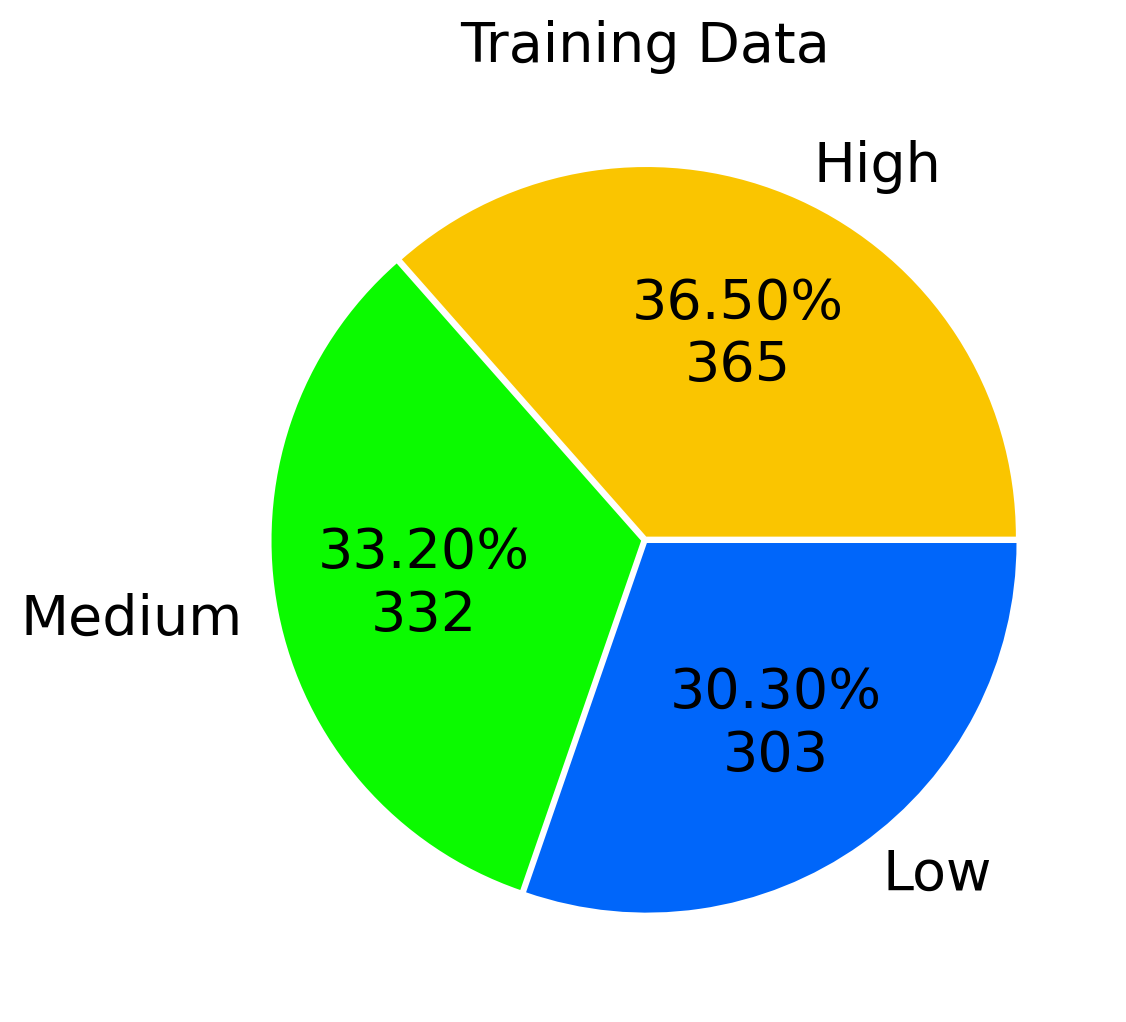

In [8]:
plt.figure(figsize=(6, 6))
plt.title('Training Data', fontsize=20)
plt.pie(df.level.value_counts(),
    labels=mapping.keys(),
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df.level.value_counts() /100)),
    explode=tuple(0.01 for i in range(3)),
    textprops={'fontsize': 20}
)
plt.show()

Correlation Plot
A correlation plot is a quick and effective tool for identifying linear relationships between quantitative variables. It utilizes correlation coefficients, such as Pearson's, to quantify the strength and direction of these relationships.

Strengths:

Linear Relationship Identification: Quickly reveals linear associations between variables.
Interpretation: Correlation coefficients are easy to interpret.
Limitations:

Linearity Assumption: Limited to linear relationships; may miss non-linear associations.
Outlier Sensitivity: Prone to influence from outliers.
Quantitative Variables Only: Applicable mainly to quantitative data.
Despite these limitations, correlation plots serve as a valuable initial step in understanding relationships within a dataset, especially for their speed and simplicity.

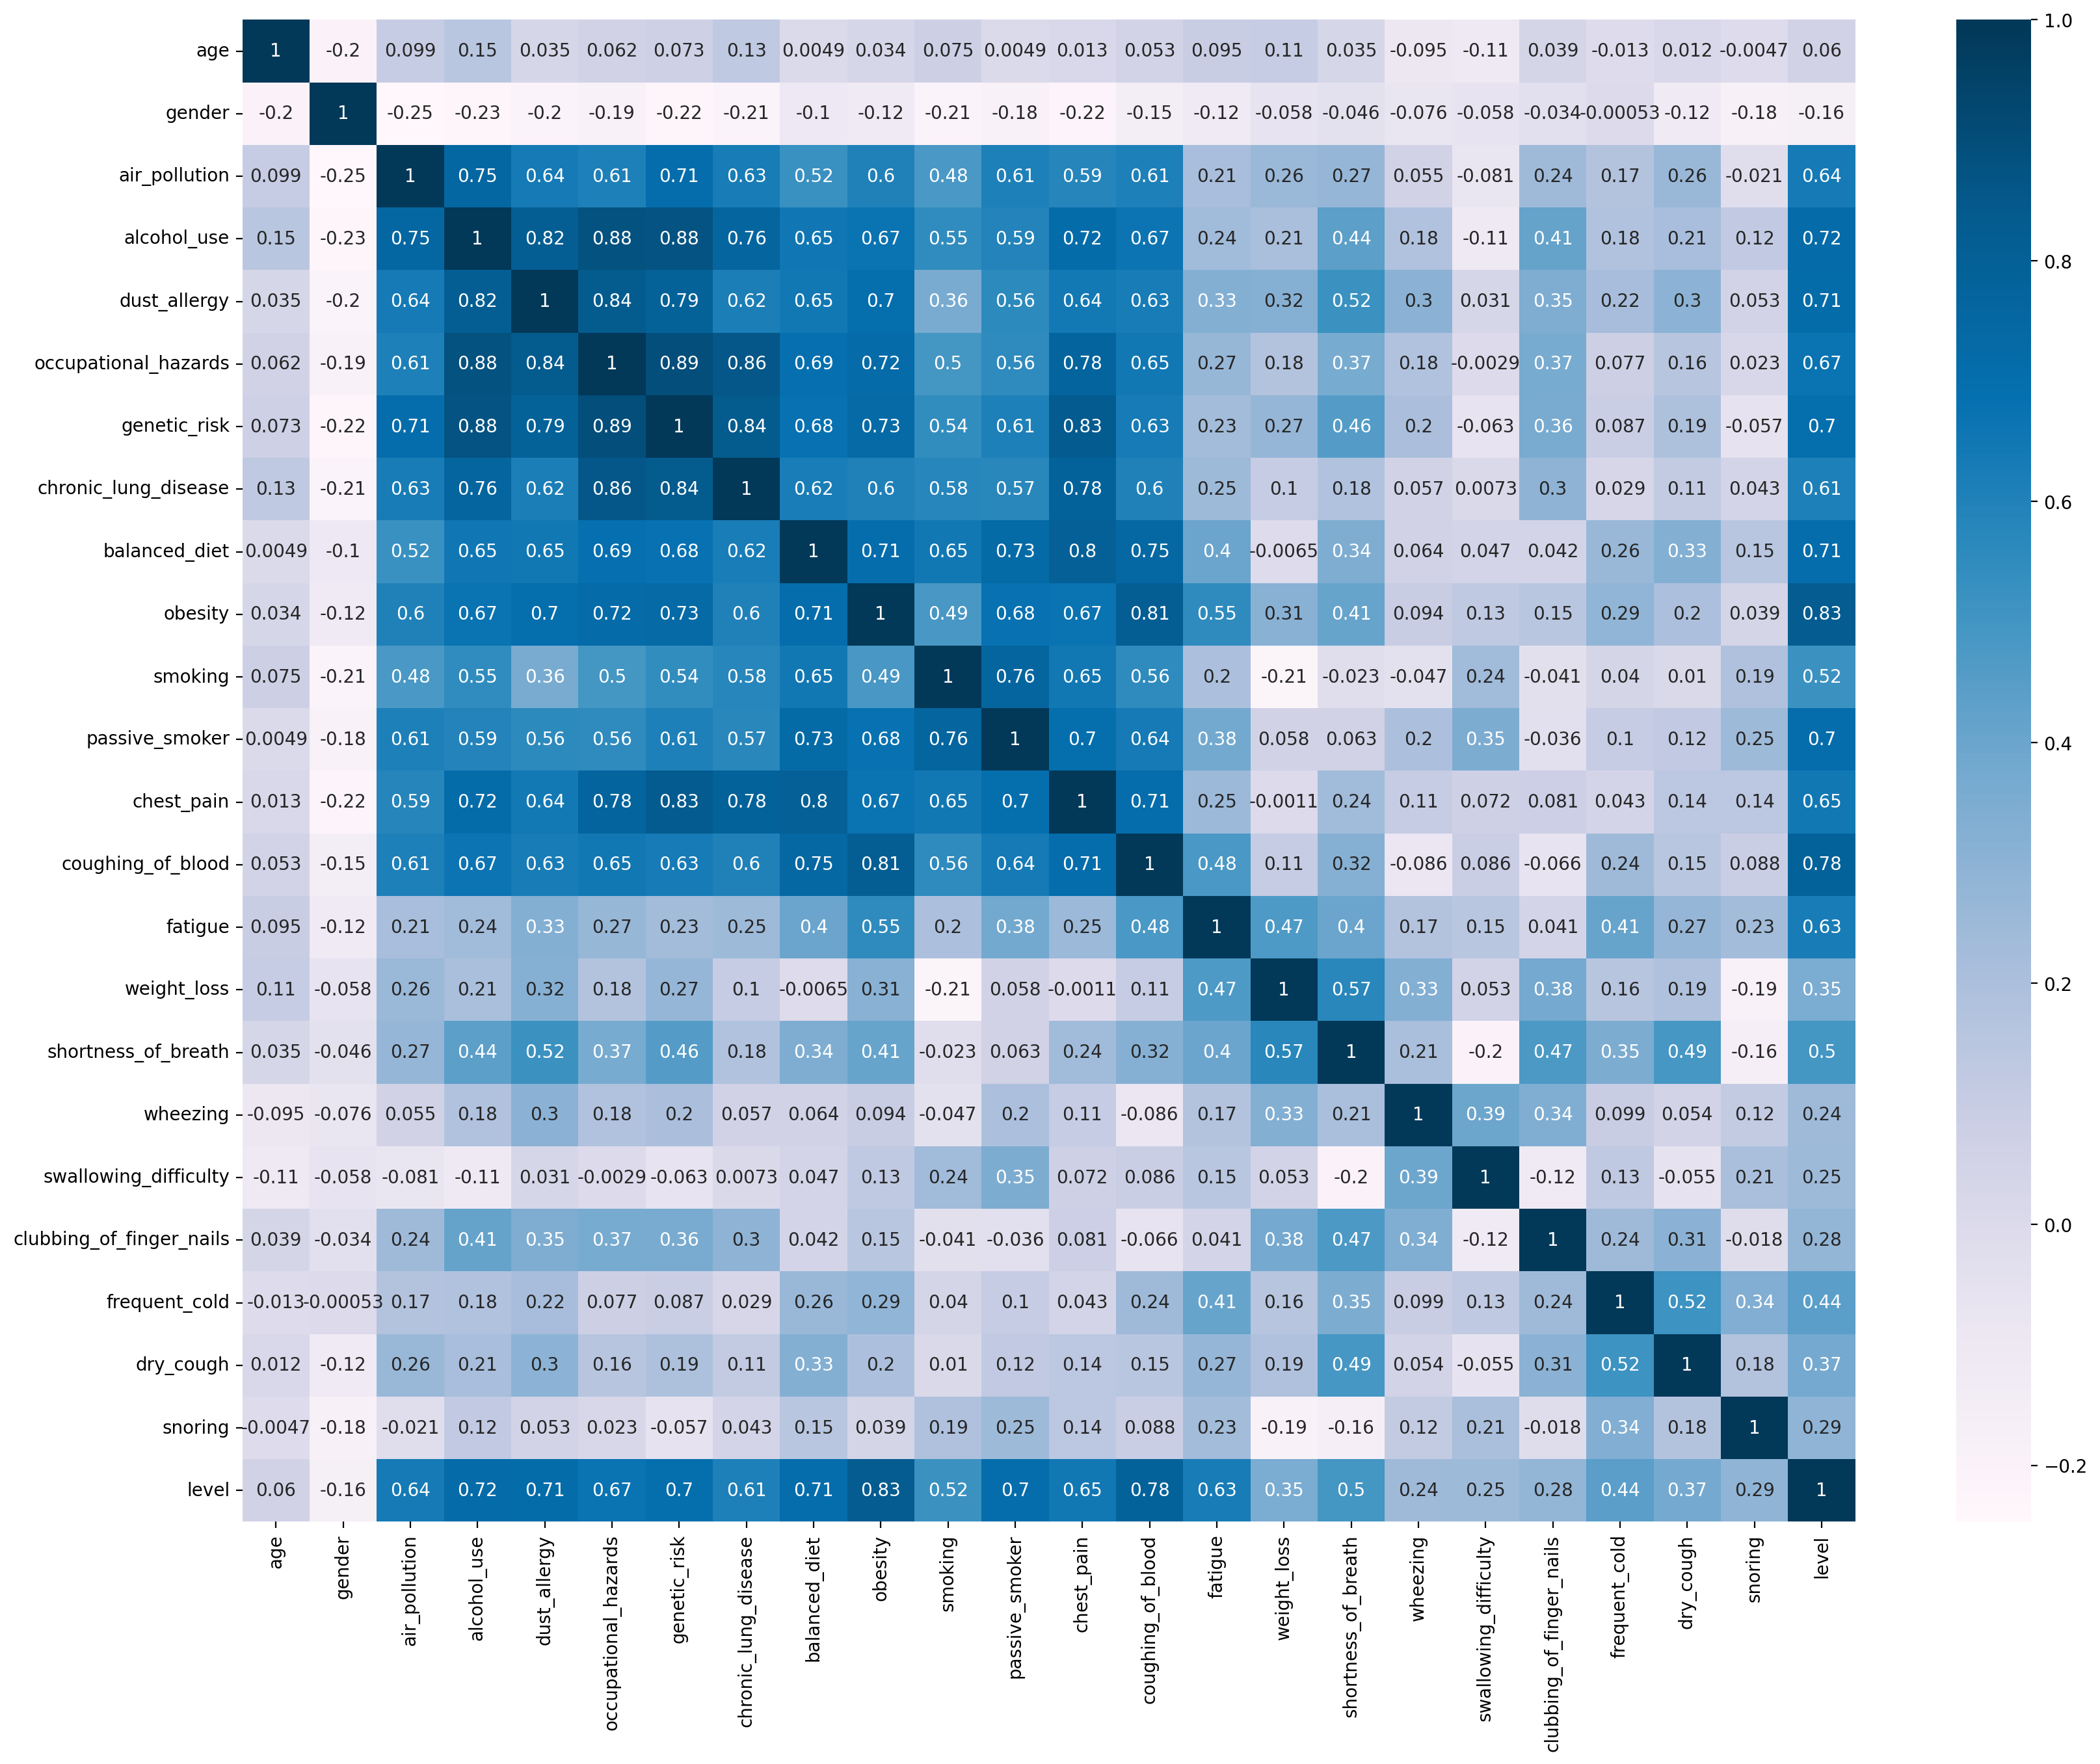

In [9]:
# Correlation plot
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

In [11]:
# Colors
colors = ['lightcoral',
          'brown',
          'lightseagreen',
          'maroon',
          'deeppink',
          'darkorange',
          'royalblue',
          'darkviolet',
          'gold',
          'crimson',
          'lightsteelblue',
          'salmon',
          'mediumseagreen',
          'olivedrab',
          'blue',
          'limegreen',
          'slateblue',
          'red',
          'steelblue',
          'teal',
          'peru',
          'dimgray',
          'violet',
          'cyan']

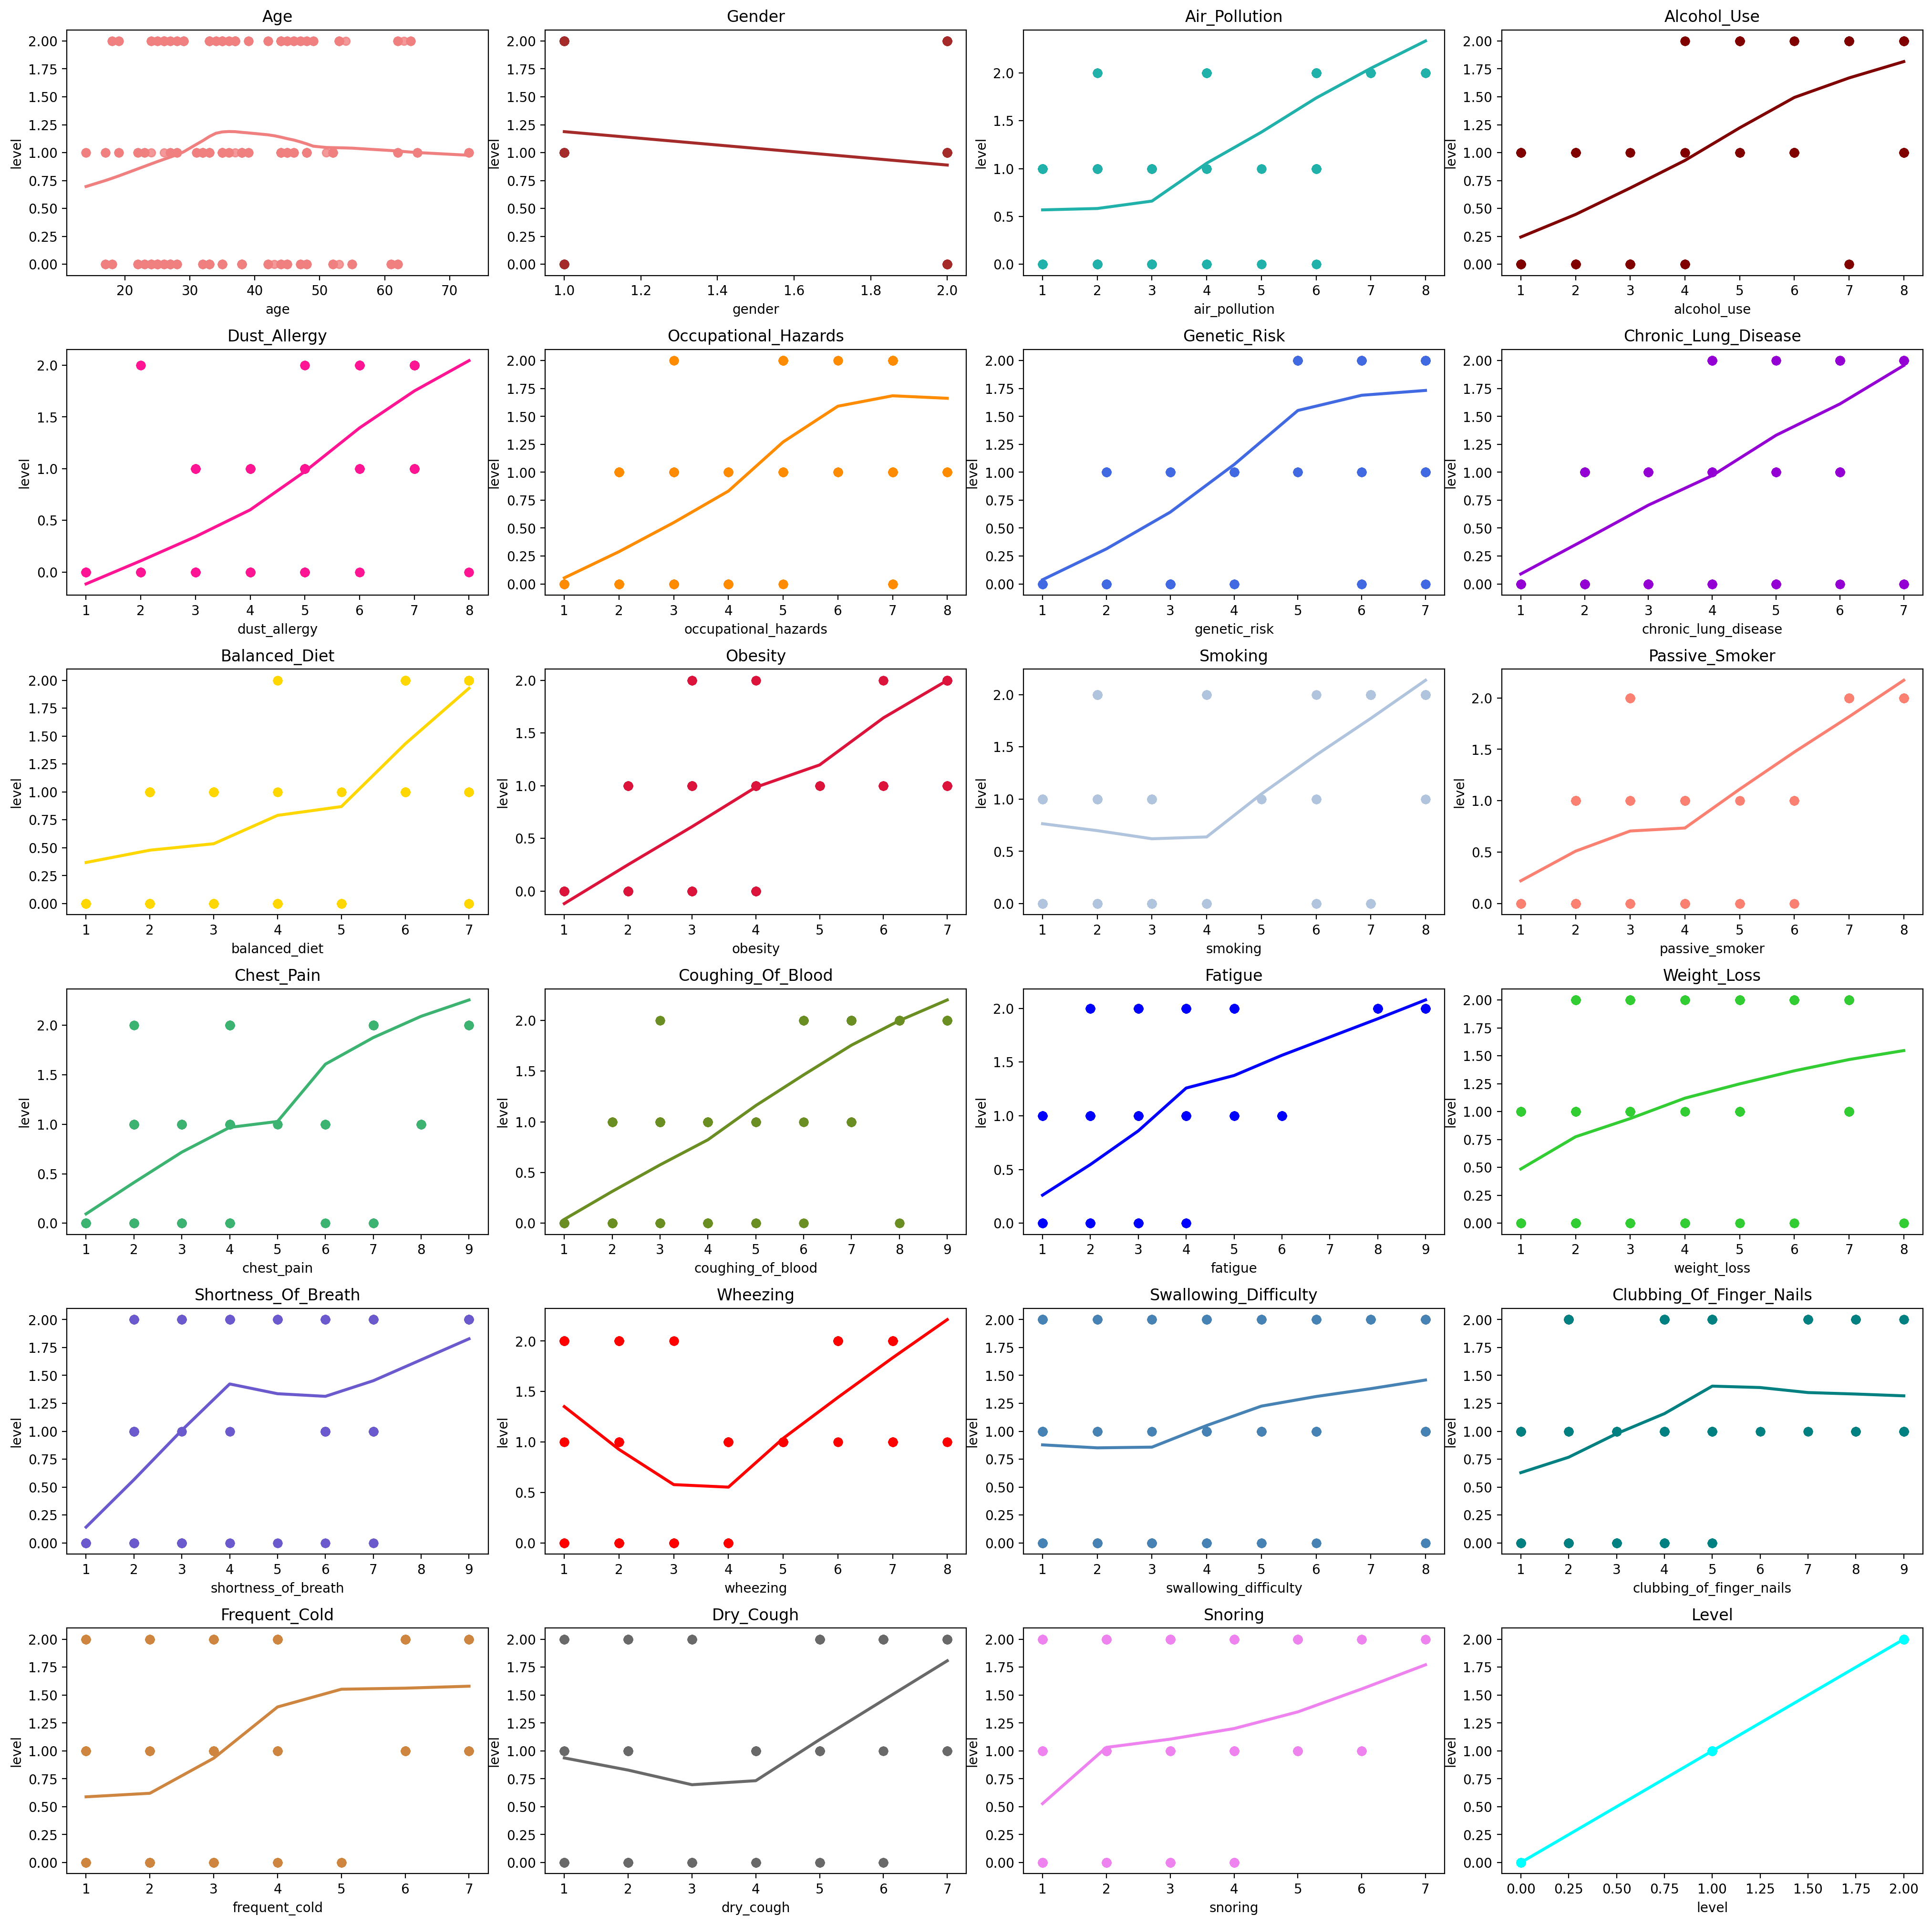

In [12]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.regplot(x=col, y='level', data=df, lowess=True, color=colors[i], ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.6, h_pad=1)
plt.show()

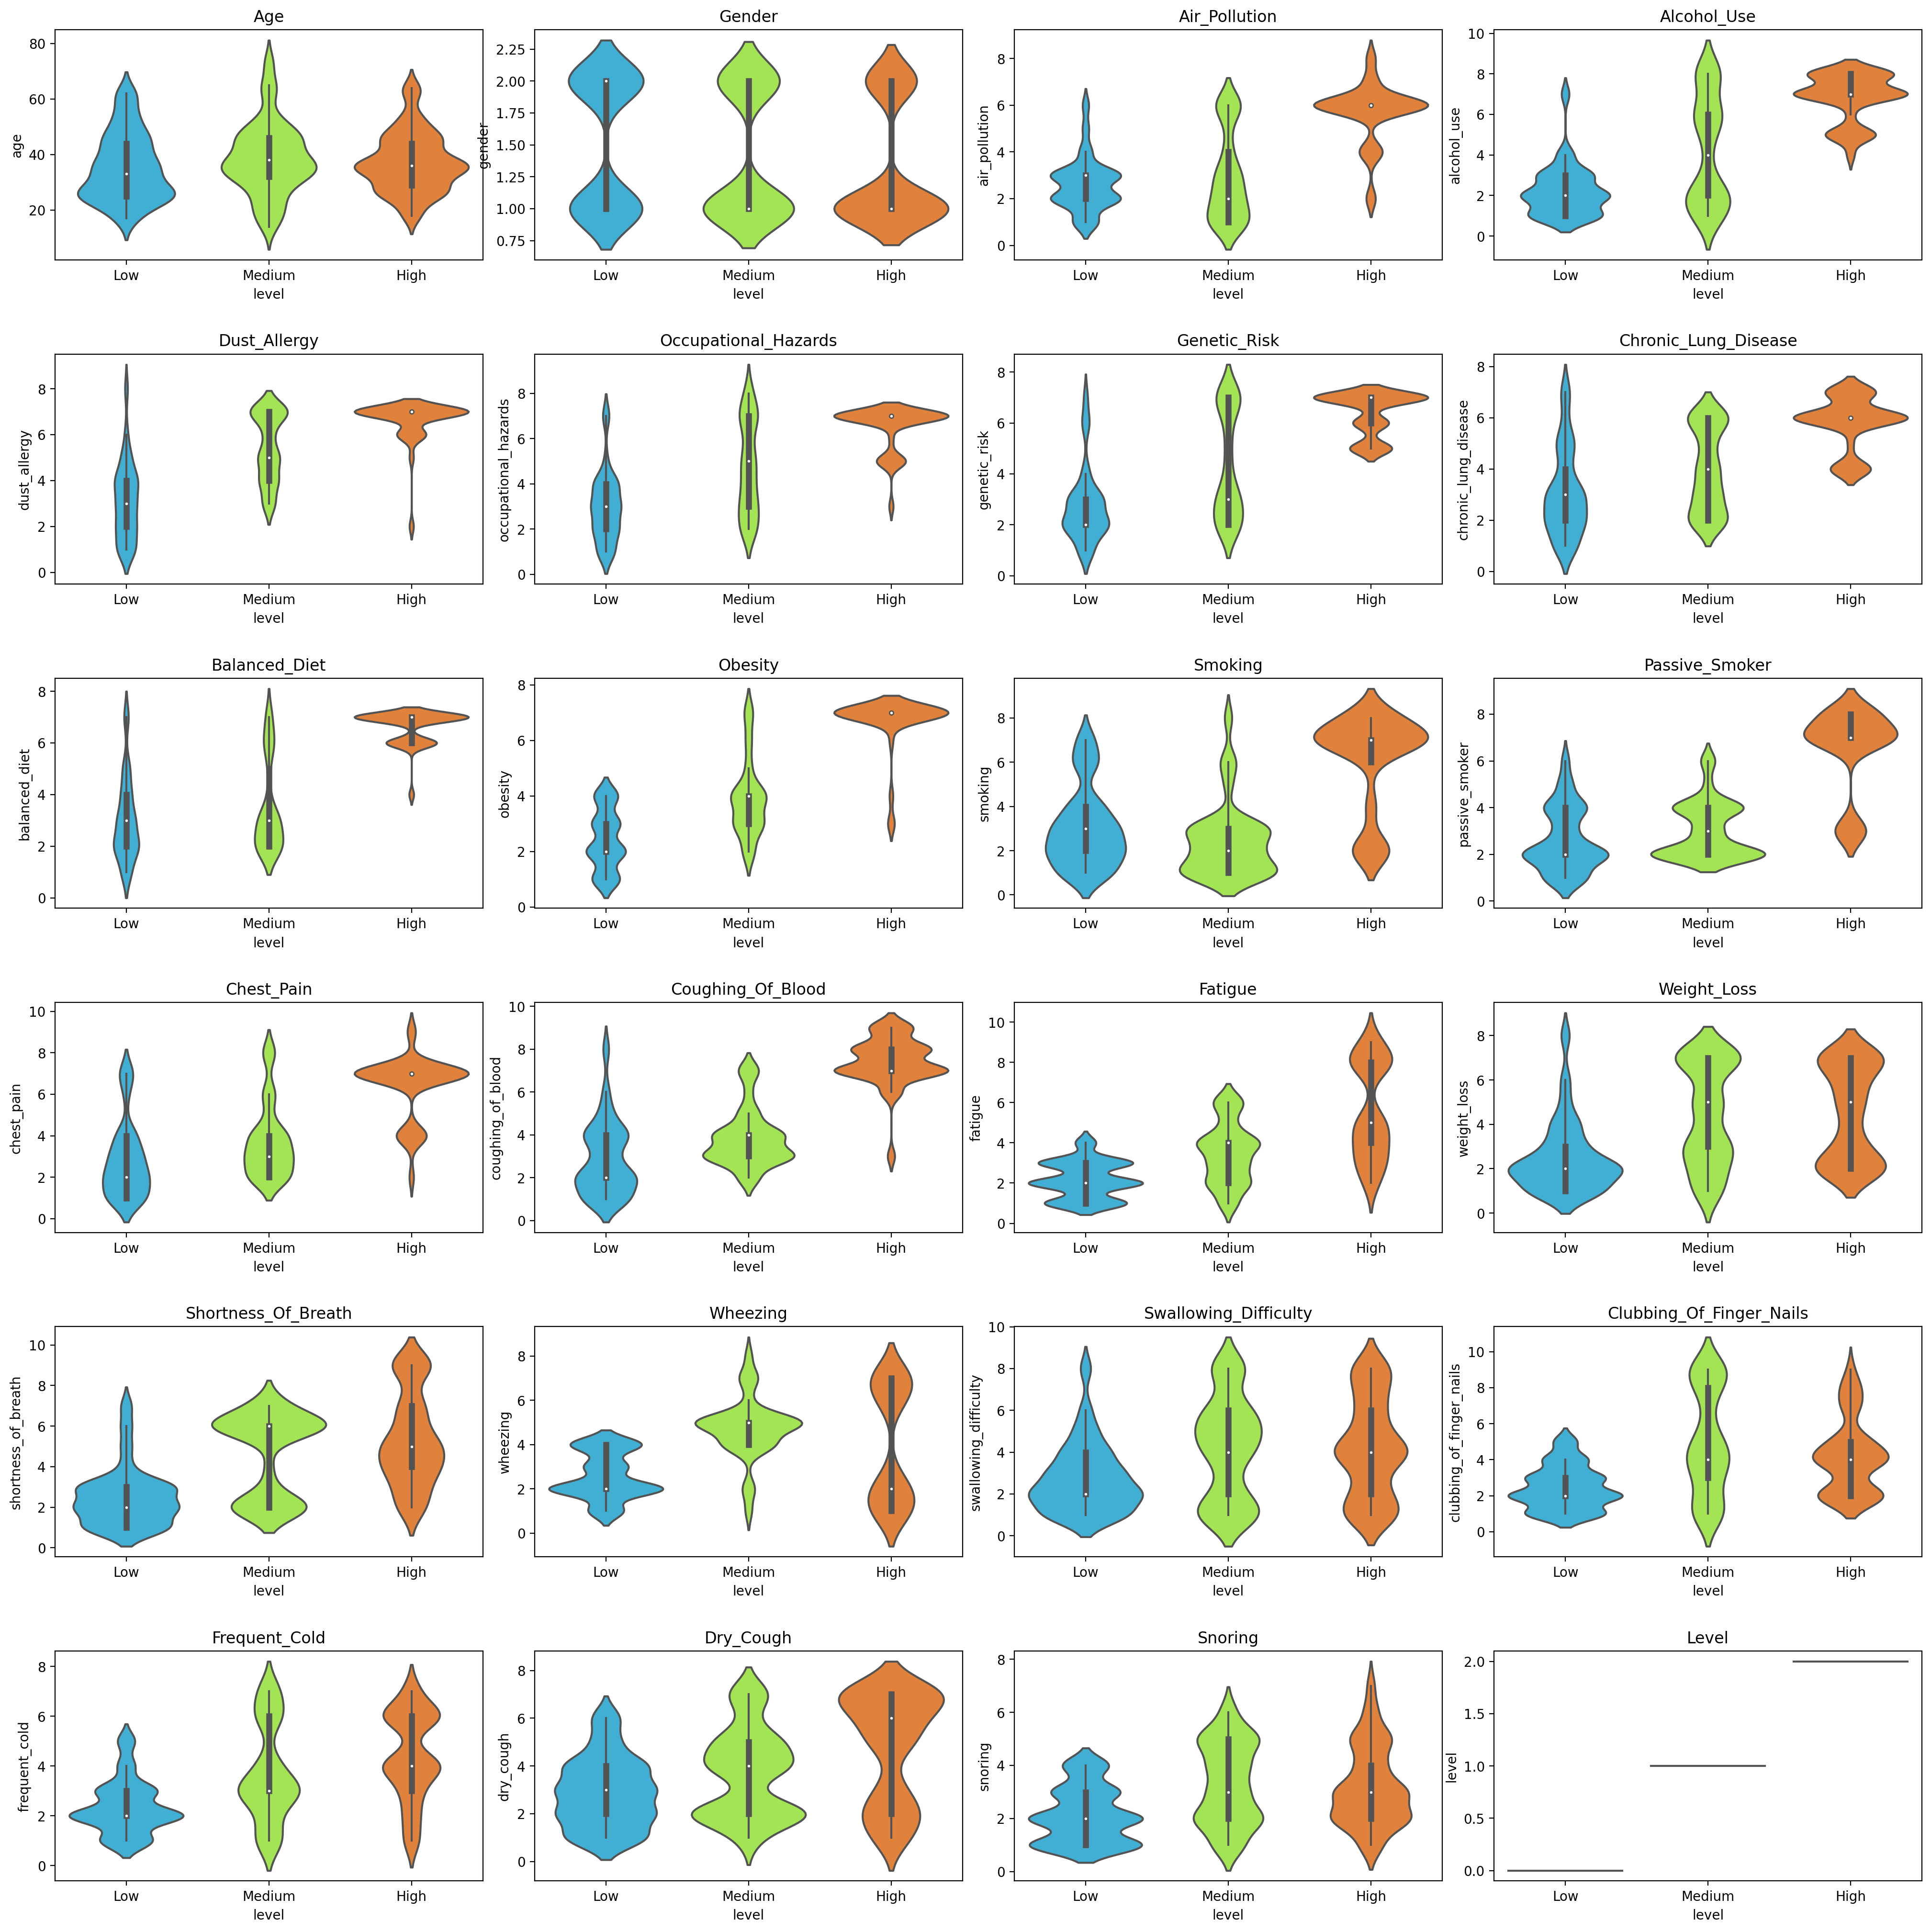

In [13]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
                   y=col, data=df, hue_order='level', palette='turbo', ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=2.5)
plt.show()

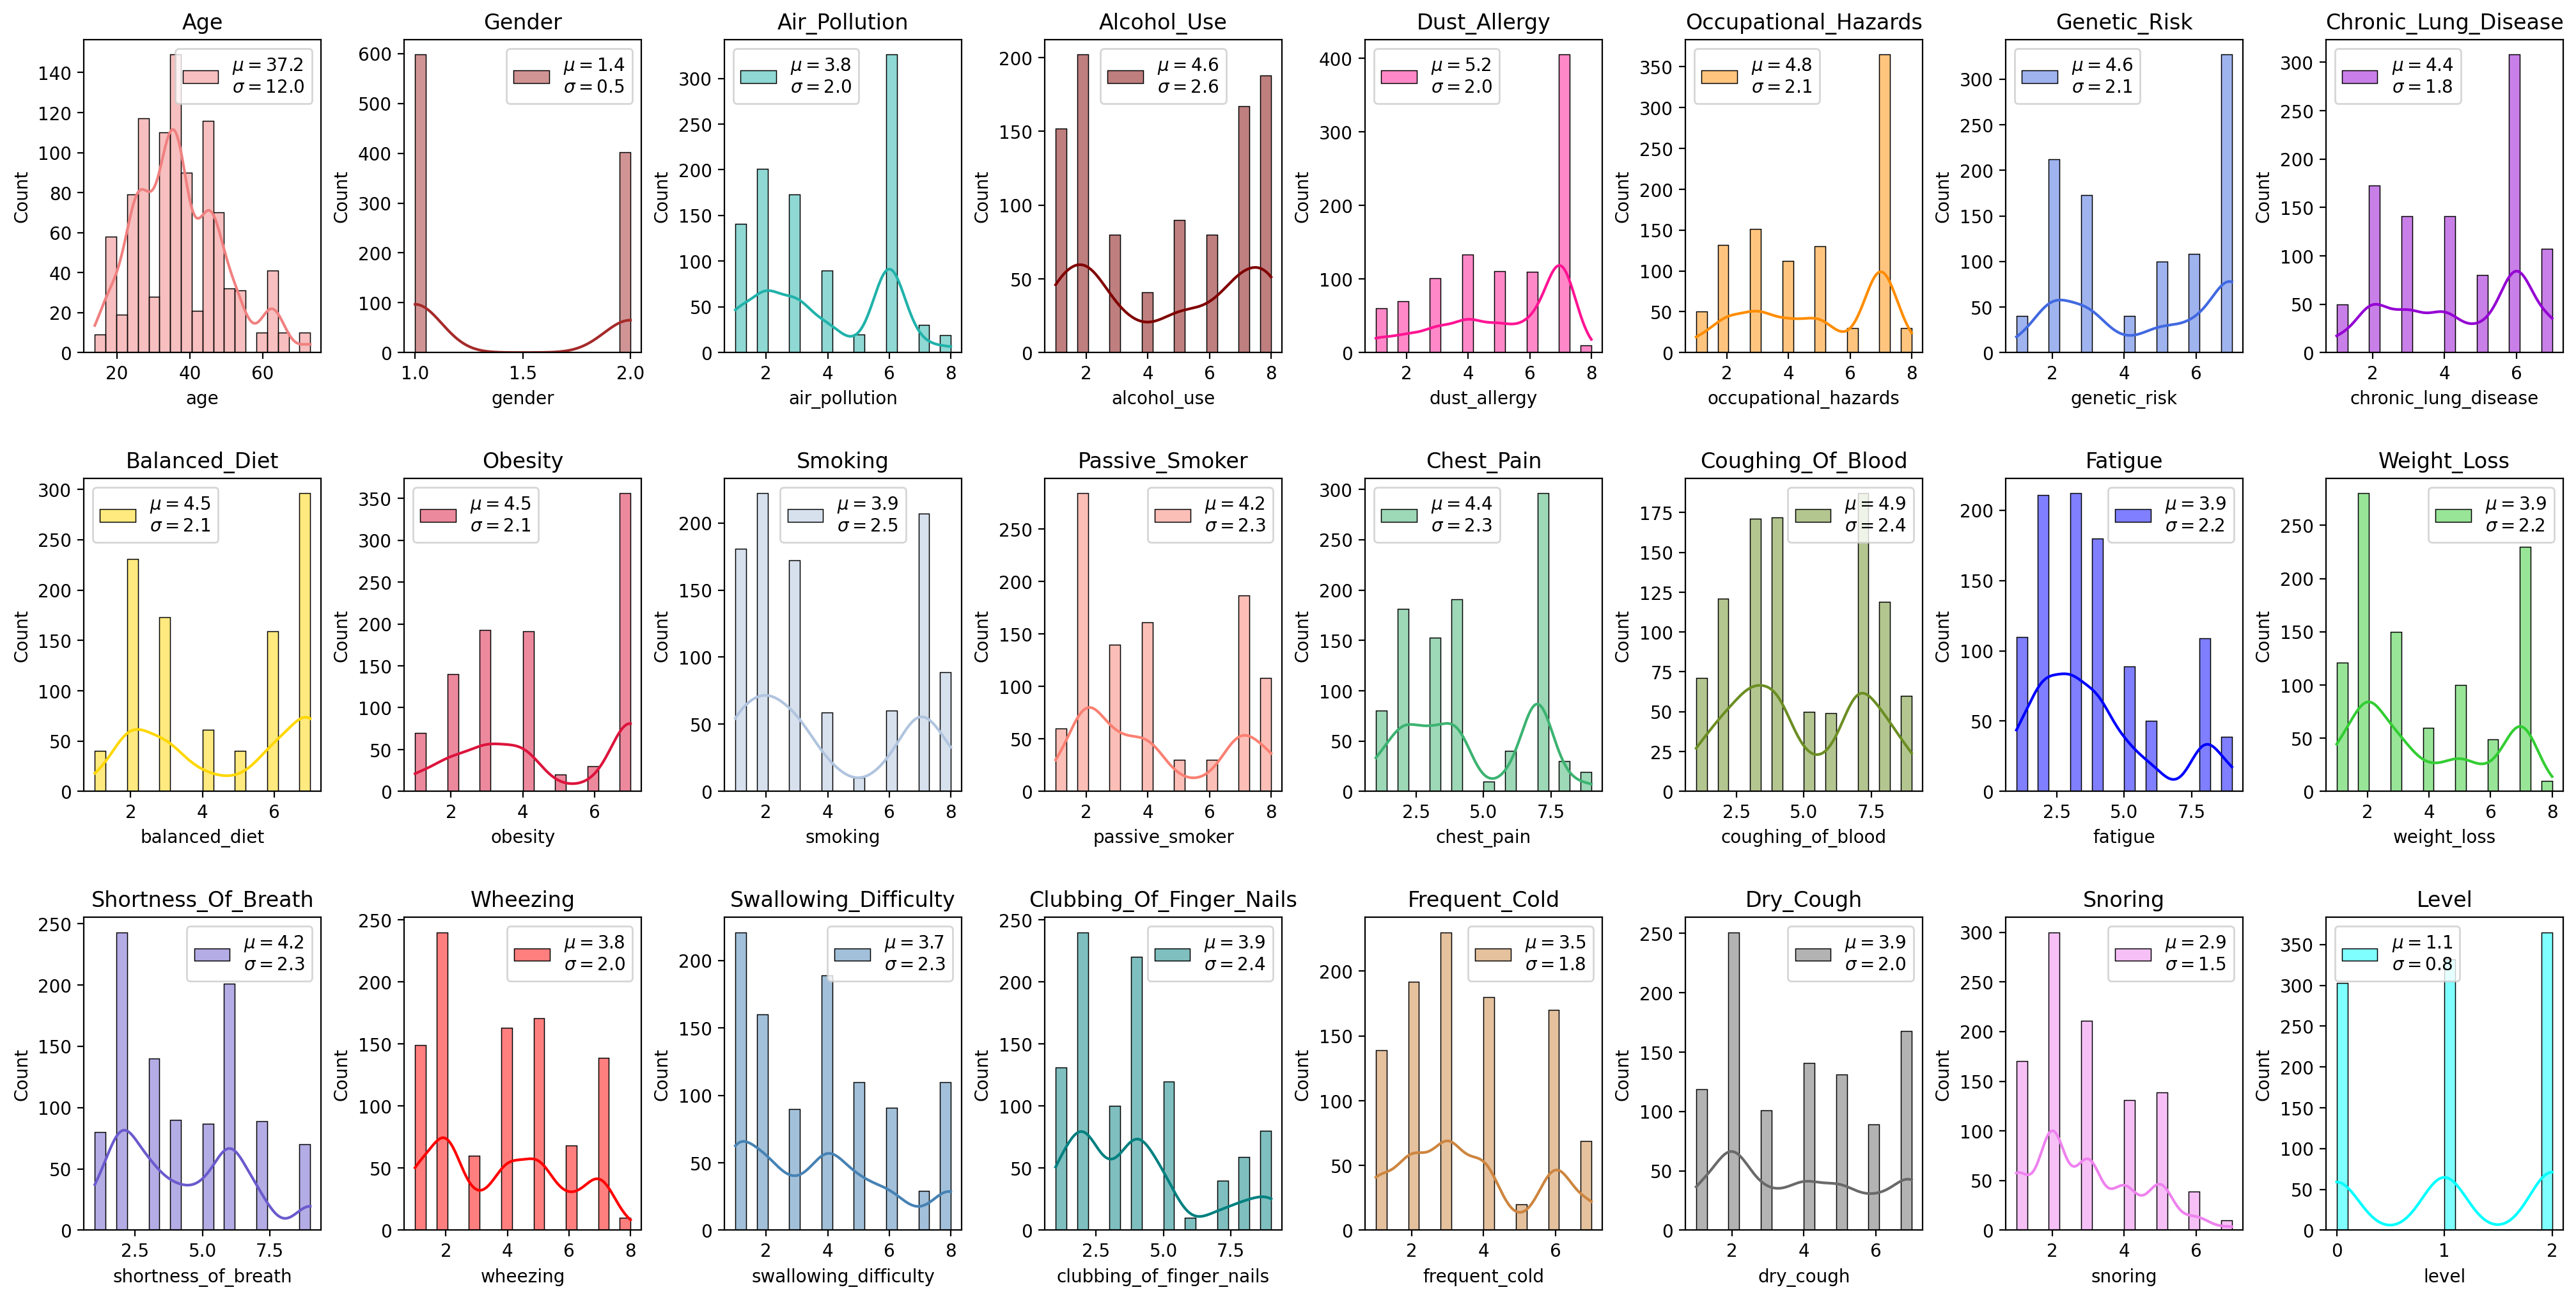

In [14]:
fig, ax = plt.subplots(ncols=8, nrows=3, figsize=(20, 10))
ax = ax.flatten()
i = 0

for k, v in df.items():
    mu, sigma = norm.fit(v)
    sns.histplot(v,
                 kde=True,
                 bins=20,
                 color=colors[i],
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].set_title(f'{k.title()}')
    ax[i].legend()
    i += 1
    
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

# 4 - Model Building

4.1 | Training Testing Splitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (700, 23) and X Testing (300, 23)
Shapes - Y Training: (700,) and Y Testing (300,)

Training output counts
level
2    248
1    233
0    219
Name: count, dtype: int64


4.2 | Multinomial Logistic Regression

Overview: Multinomial Logistic Regression is a classification algorithm that extends logistic regression to handle multiple classes. It models the probability of each class and predicts the class with the highest probability.

Algorithm:

Log-Odds Calculation: Multinomial logistic regression calculates log-odds for each class relative to a reference class.
Softmax Function: It then applies the softmax function to convert log-odds into probabilities, ensuring they sum to 1 across all classes.
Prediction: The class with the highest probability is predicted as the final output.
Parameters:

penalty: Regularization term. 'l2' is commonly used to prevent overfitting.
C: Inverse of regularization strength. Smaller values indicate stronger regularization.
fit_intercept: Whether to calculate the intercept for this model.
solver: Optimization algorithm. 'lbfgs' is suitable for multiclass problems.
multi_class: Method to handle multiple classes. 'auto' chooses 'ovr' for binary, and 'multinomial' for more than two classes.

In [16]:
MR = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=40)

# fitting model
MR.fit(X_train, y_train)

# predicting with model
MR_pred = MR.predict(X_test)

# Printing model coefficents
print('Intercept: \n', MR.intercept_)
print('Coefficients: \n', MR.coef_)

Intercept: 
 [ 36.7173178   -0.45375074 -36.26356707]
Coefficients: 
 [[-0.03680214  0.07866771 -0.14374483 -0.41357581 -0.28474772  0.03226249
  -0.46929271 -0.21875184 -0.03312319 -1.01590851 -0.02798886 -0.9121456
   0.28616932 -0.83421728 -0.74978221  0.03596989 -0.23743537 -0.90160452
  -0.8013645  -0.77615039 -0.64112497 -0.52196546 -0.6979537 ]
 [ 0.04253414 -0.14193175 -0.32681934 -0.19291183  0.41660665 -0.02790504
   0.22963807 -0.1394621  -0.30280195  0.52075254 -0.08853496  0.10990078
  -0.35239925 -0.00558623 -0.09406388 -0.41791242 -0.24251332  0.7250629
  -0.04126459  0.3398558   0.21091132  0.13030669  0.412703  ]
 [-0.00573201  0.06326403  0.47056417  0.60648765 -0.13185893 -0.00435745
   0.23965464  0.35821394  0.33592514  0.49515597  0.11652383  0.80224482
   0.06622993  0.83980351  0.84384608  0.38194253  0.4799487   0.17654162
   0.84262909  0.43629458  0.43021365  0.39165877  0.2852507 ]]


4.2.1 | Confusion Matrix of Multinomial Model

In [33]:
def CM(y_test, y_pred_test, col_names, title='', cmap=plt.cm.Blues):
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(9,7))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f", cmap=cmap, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix ' + title)
    plt.show()

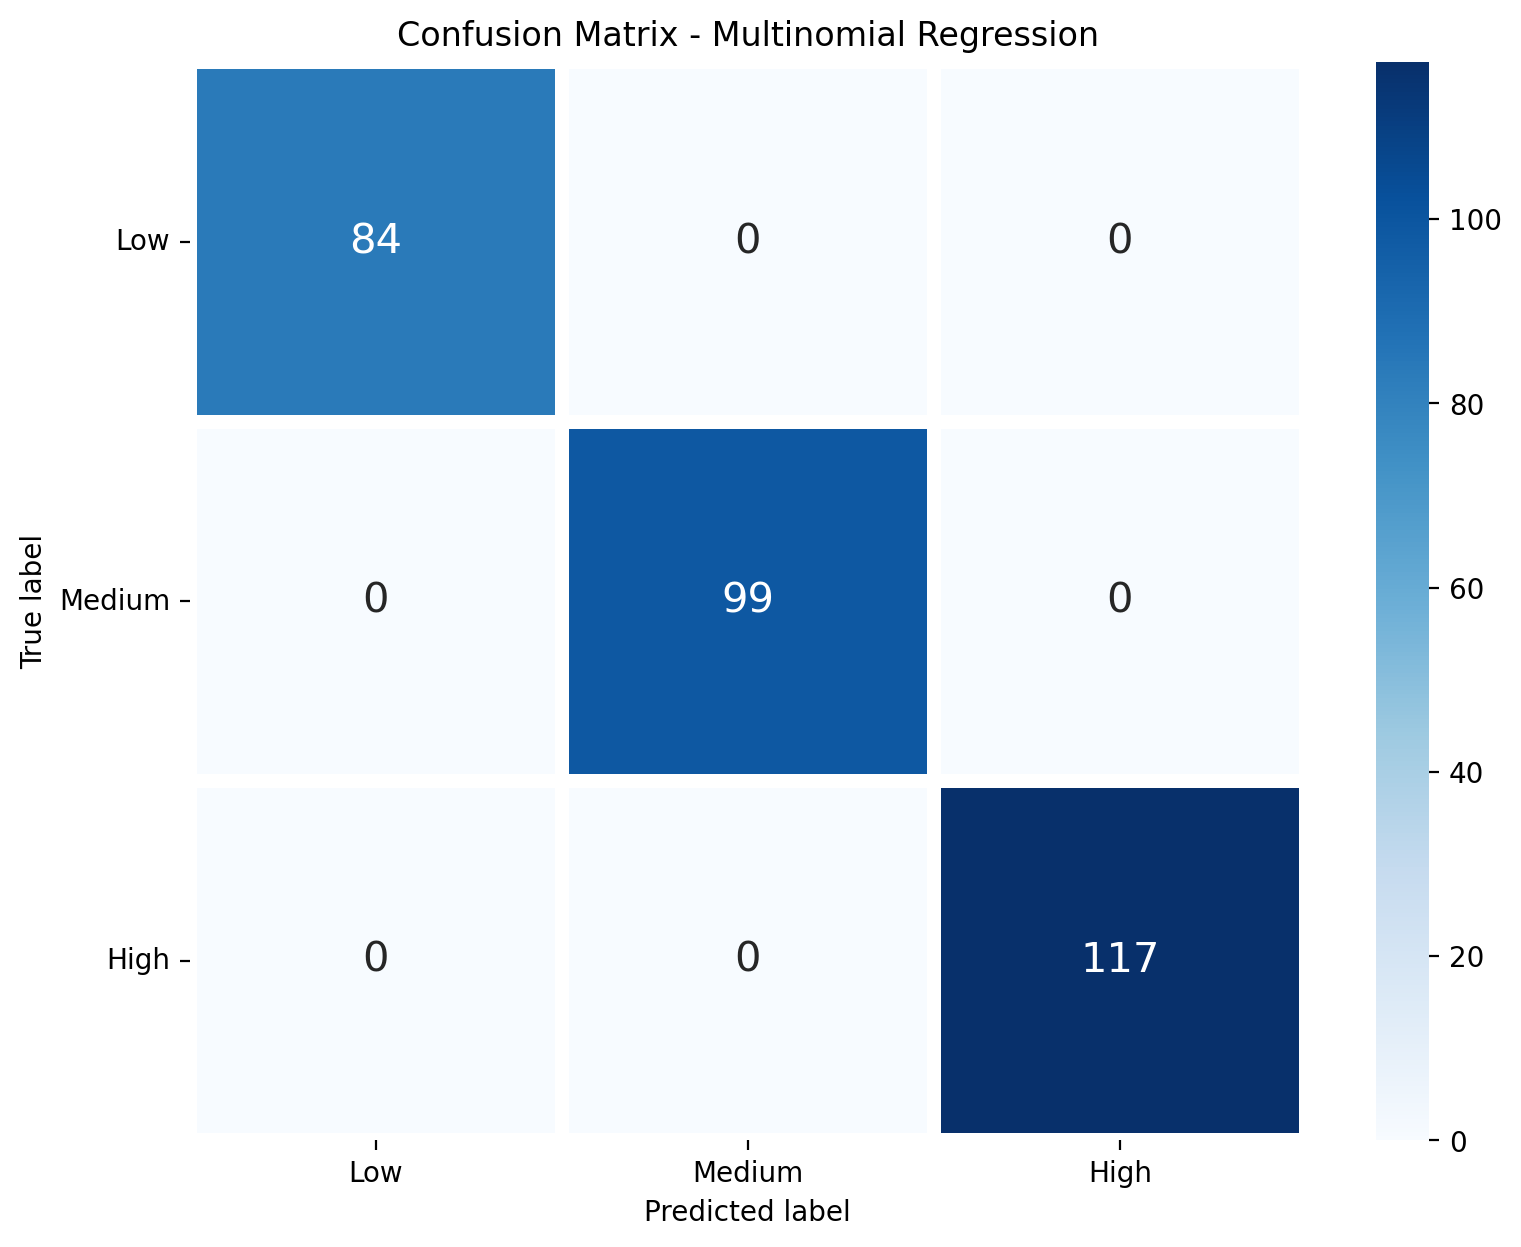

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [34]:
CM(y_test, MR_pred, col_names=['Low', 'Medium', 'High'], title='- Multinomial Regression')
# Model report
ml_accuracies['Multinomial Model'] = accuracy_score(y_test, MR_pred)
print(classification_report(y_test, MR_pred))


# 4.3 | Random Forest Classifier 


Overview: Random Forest Classifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes for classification tasks. It enhances the accuracy and robustness of predictions by combining the results from multiple trees.

Algorithm:

Bootstrap Sampling: Random Forest builds multiple decision trees by sampling, with replacement, from the training dataset (bootstrap sampling).
Feature Randomization: At each node of the tree, a random subset of features is considered for splitting, adding diversity to the trees.
Voting Mechanism: For classification, the mode (most frequent class) among the trees is the final predicted class.
Parameters:

n_estimators: Number of trees in the forest. Higher values generally lead to better performance.
criterion: The function to measure the quality of a split. 'gini' for Gini impurity or 'entropy' for information gain.
max_depth: Maximum depth of the individual trees. Controls the complexity of each tree.
min_samples_split: Minimum number of samples required to split an internal node.
min_samples_leaf: Minimum number of samples required to be at a leaf node.

In [20]:
def random_forest_n_best(X_train, y_train, X_test, y_test, n_list):
    
    scores = []
    
    for n in n_list:
        RF = RandomForestClassifier(n_estimators=n, random_state=40)
        RF.fit(X_train, y_train)
        RF_pred = RF.predict(X_test)

        scores.append(accuracy_score(y_test, RF_pred))

    plt.plot(n_list, scores)
    plt.xlabel('Value of n_estimators for Random Forest Classifier')
    plt.ylabel('Testing Accuracy')
    plt.grid(alpha=0.1)
    plt.show()

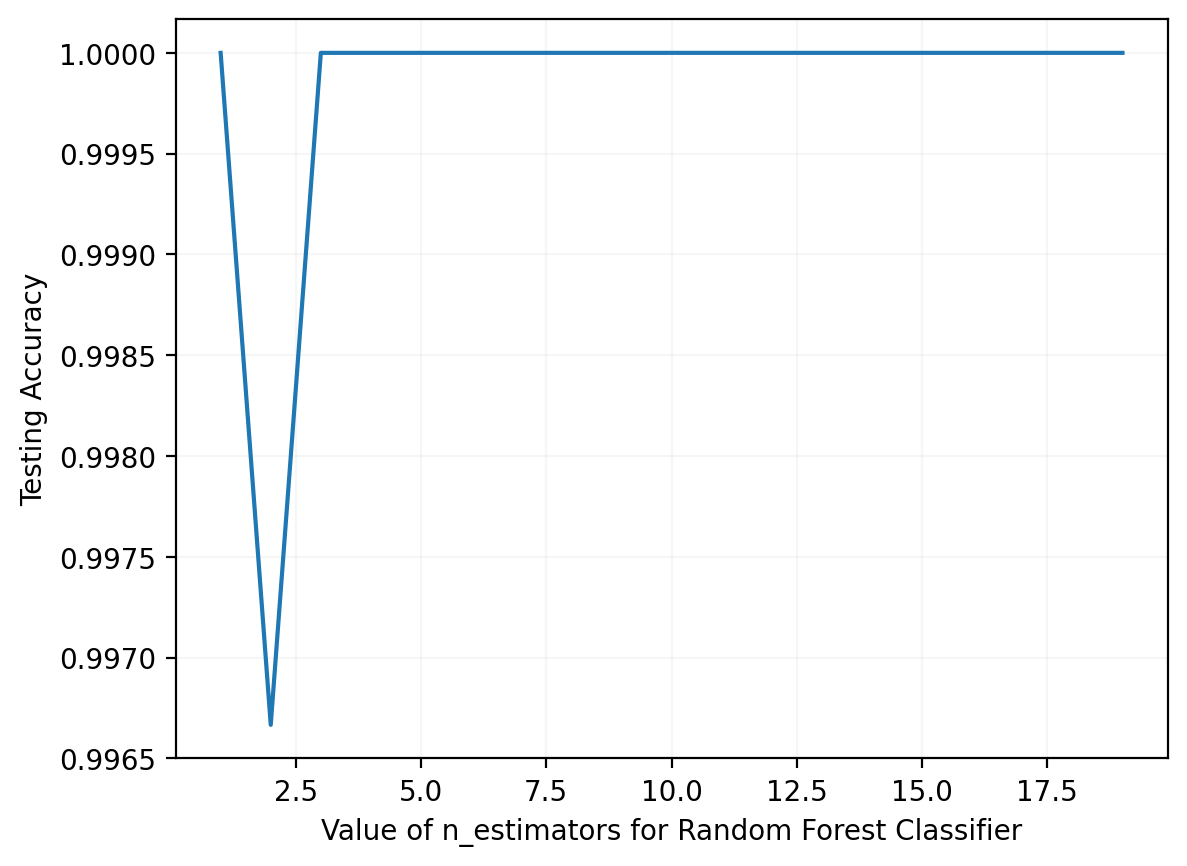

In [21]:
# n Accuracy analysis
random_forest_n_best(X_train, y_train, X_test, y_test, n_list=np.arange(1,20,1))

In [26]:
from sklearn import tree
# Define model and set random_state
RF = RandomForestClassifier(n_estimators=3, random_state=40)

# fitting model
RF.fit(X_train, y_train)

# predicting with model
RF_pred = RF.predict(X_test)
pd.Series(RF_pred).value_counts()

2    117
1     99
0     84
Name: count, dtype: int64

4.3.1 | Random Forest Classifier Plot

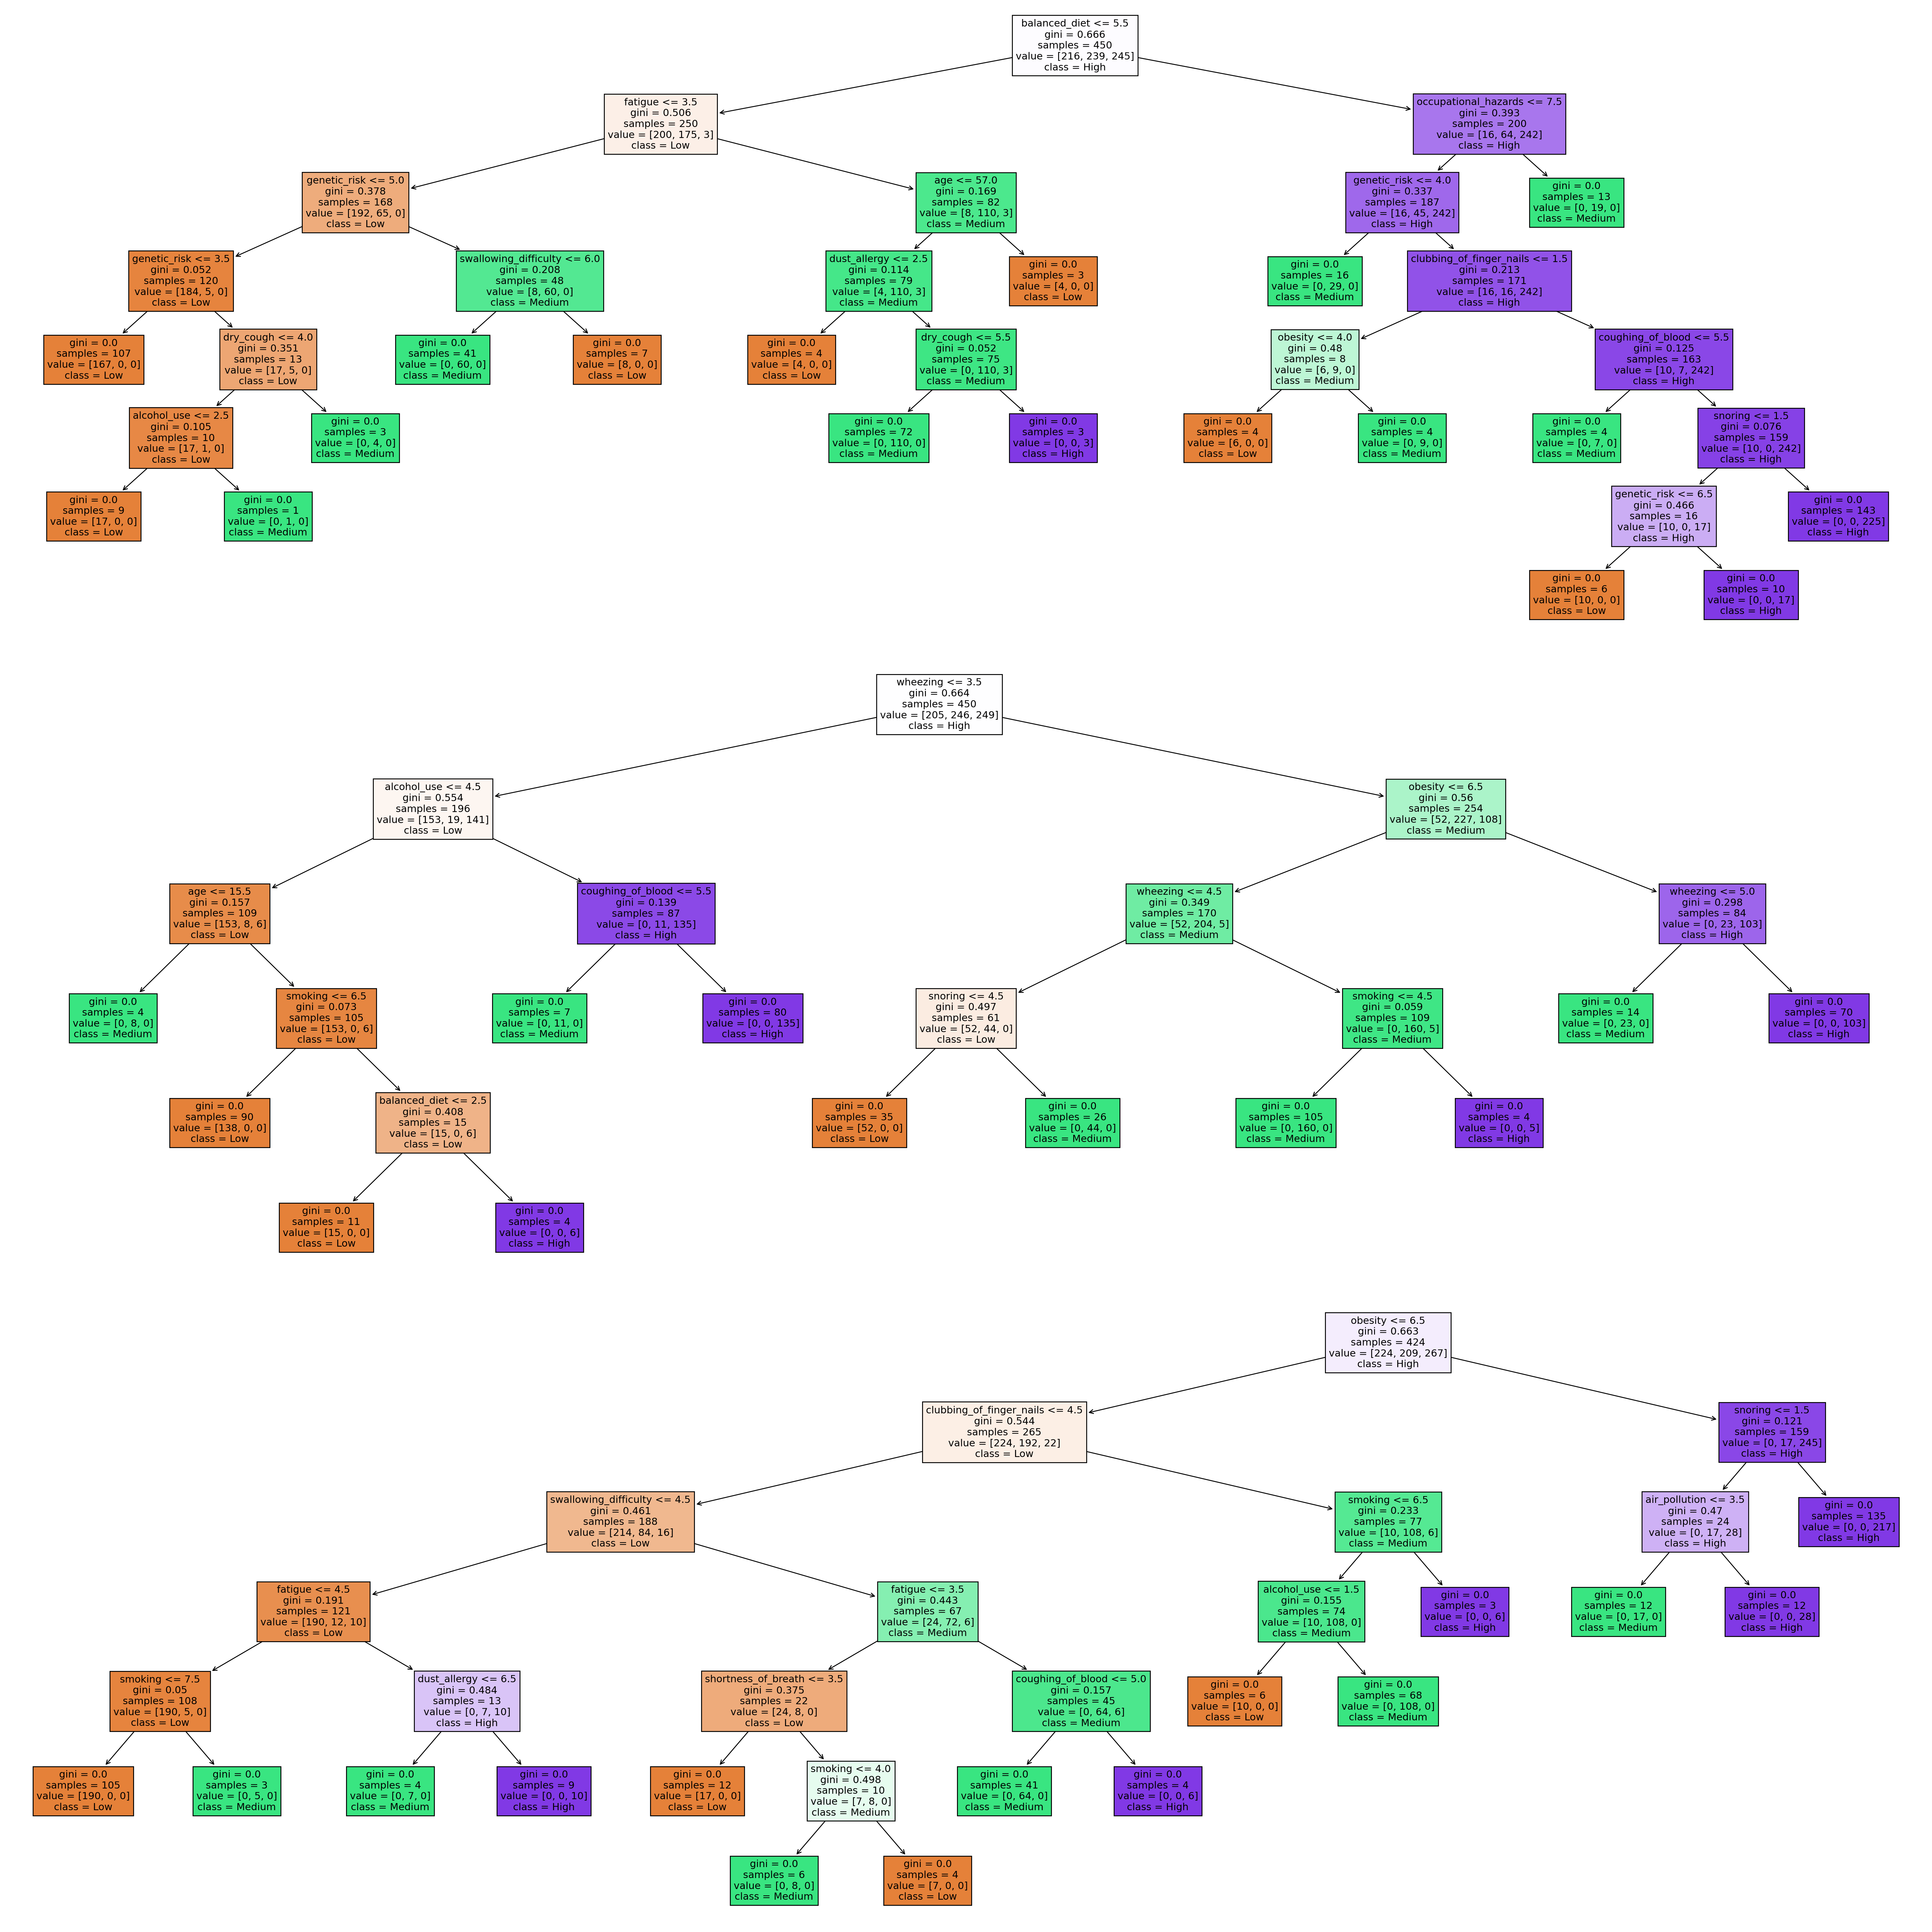

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt

# Number of trees in the random forest
trees = len(RF.estimators_)
cn = ['Low', 'Medium', 'High']  # Class names

# Create subplots
fig, ax = plt.subplots(nrows=trees, ncols=1, figsize=(30, 10 * trees))

for i, single_tree in enumerate(RF.estimators_):
    if trees > 1:
        # Plot each tree in the subplot
        tree.plot_tree(
            single_tree,
            feature_names=X.columns.tolist() if hasattr(X, 'columns') else None,
            class_names=cn,
            filled=True,
            fontsize=11,
            ax=ax[i]
        )
    else:
        # For single tree, directly plot
        tree.plot_tree(
            single_tree,
            feature_names=X.columns.tolist() if hasattr(X, 'columns') else None,
            class_names=cn,
            filled=True,
            fontsize=11
        )

plt.tight_layout(h_pad=2)  # Adjust layout for multiple subplots
plt.show()


4.3.2 | Confusion Matrix of Random Forest Classifier

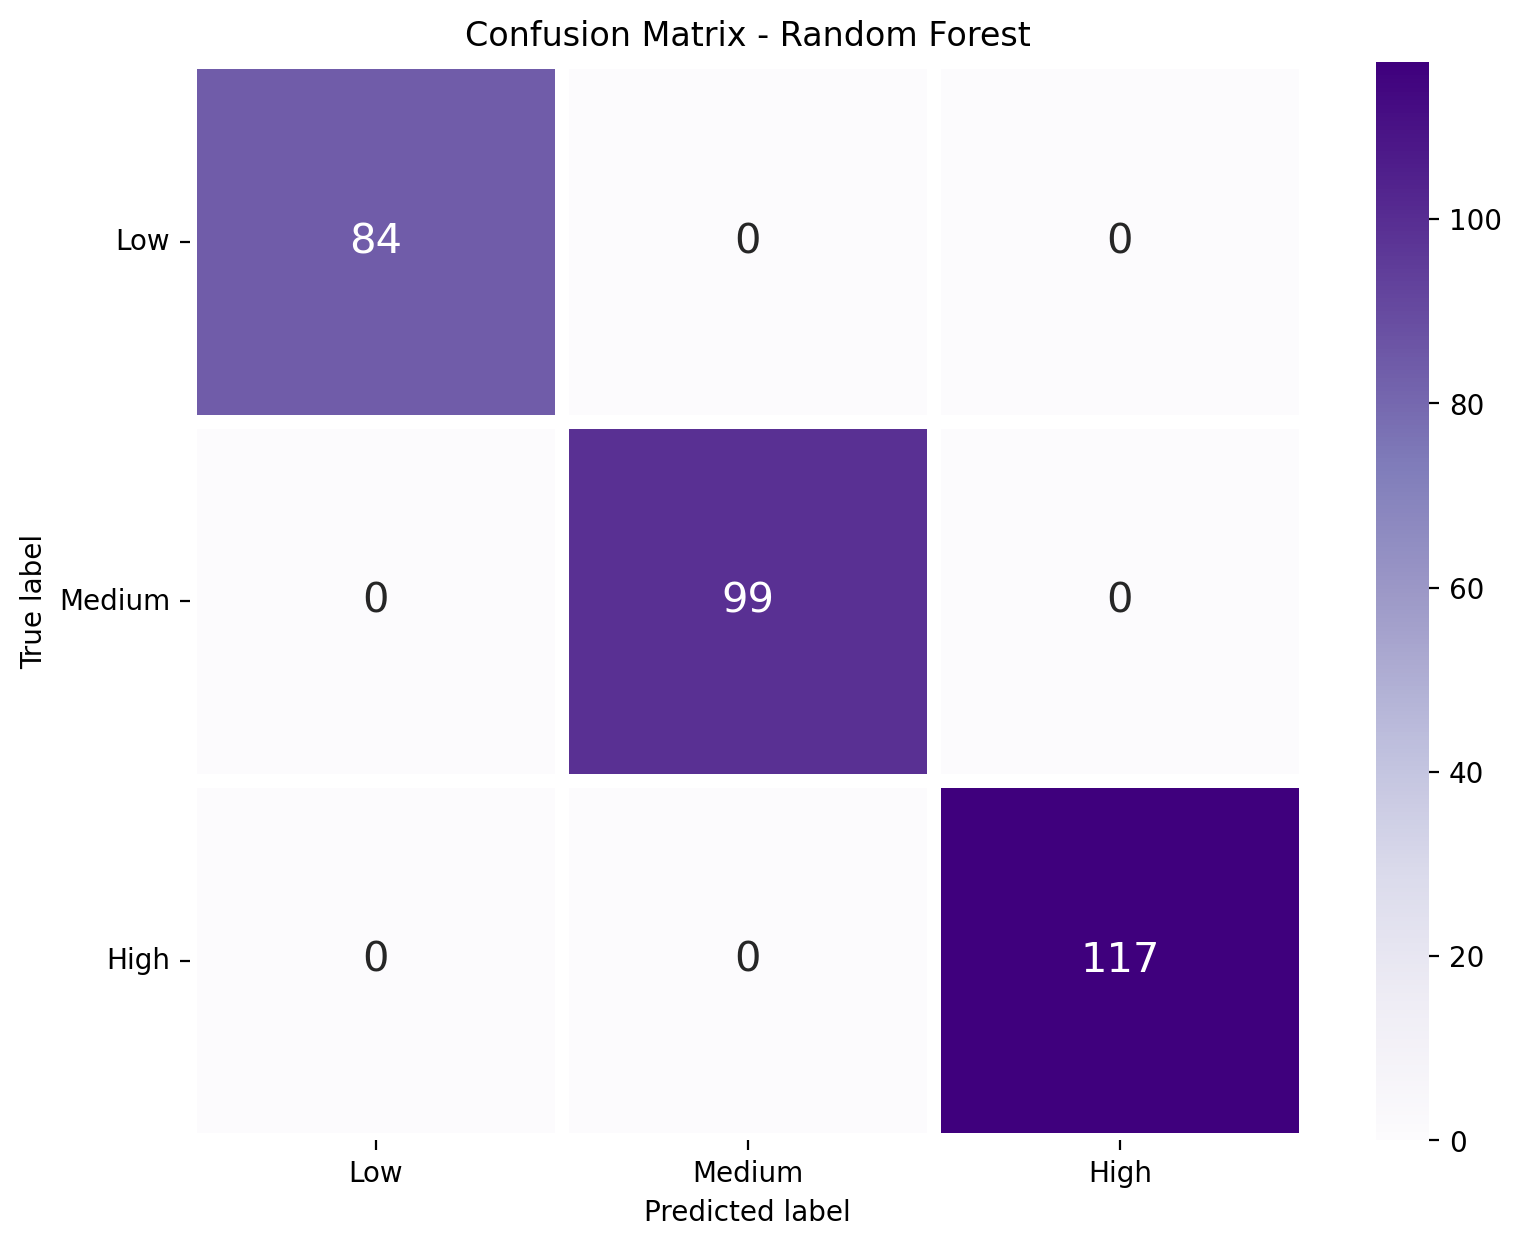

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [35]:
CM(y_test, RF_pred, col_names=['Low', 'Medium', 'High'], title='- Random Forest', cmap='Purples')

# Classification report for test data and predictions
ml_accuracies['Random Forest'] = accuracy_score(y_test, RF_pred)
print(classification_report(y_test, RF_pred))

4.4 | Gaussian Naive Bayes (GaussianNB)

In [36]:
# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions using Naive Bayes
nb_pred = nb_model.predict(X_test)

4.4.2 | Confusion Matrix of Naive Bayes

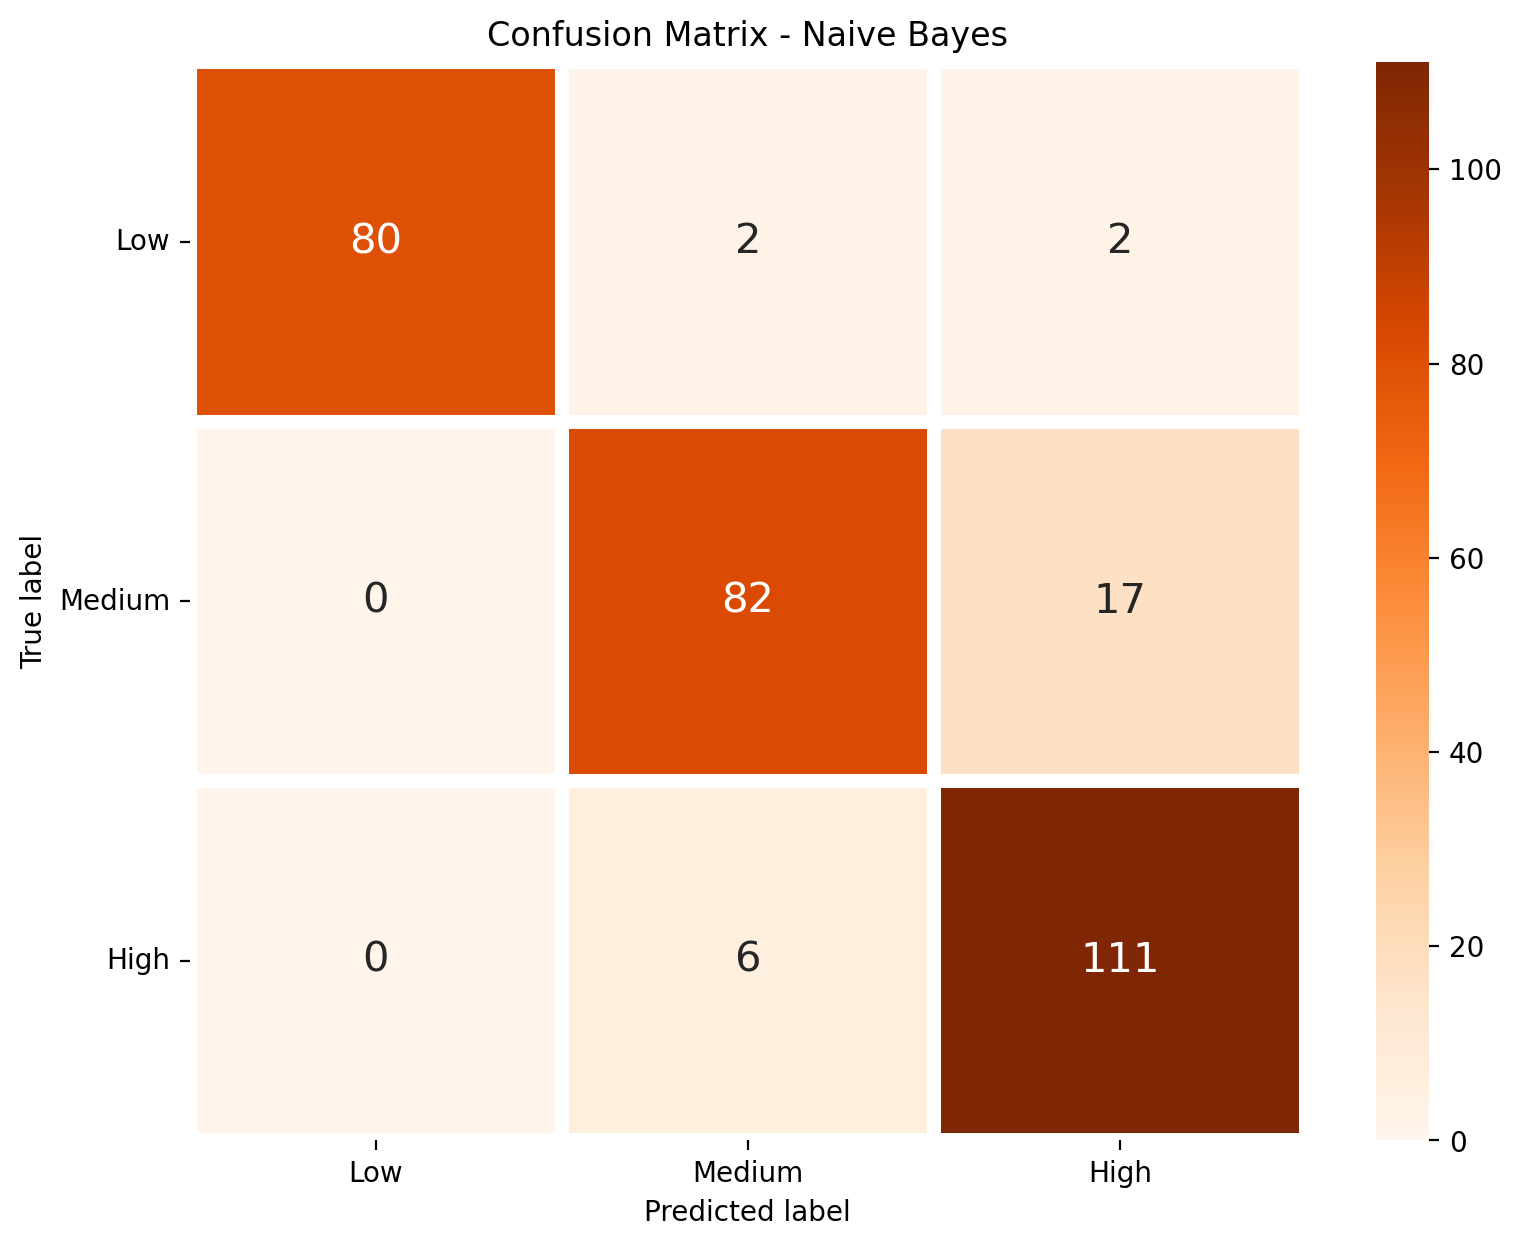

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [37]:
CM(y_test, nb_pred, col_names=['Low', 'Medium', 'High'], title='- Naive Bayes', cmap='Oranges')

# View the classification report for test data and predictions
ml_accuracies['Naive Bayes'] = accuracy_score(y_test, nb_pred)
print(classification_report(y_test, nb_pred))

# 4.5 | K-Nearest Neighbors (KNN)

In [ ]:
Overview: K-Nearest Neighbors (KNN) is a versatile classification algorithm based on the principle of similarity. It classifies a data point by considering the majority class among its K nearest neighbors in the feature space.

Algorithm:

Distance Metric: KNN uses a distance metric (typically Euclidean distance) to measure the similarity between data points.
Nearest Neighbors: It identifies the K data points in the training set that are closest to the input data point.
Majority Vote: The class label for the input point is determined by the majority class among its K nearest neighbors.
Parameters:

n_neighbors: Number of neighbors to consider. It influences the granularity of the decision boundary.
weights: Determines the weight of each neighbor. 'uniform' treats all neighbors equally, while 'distance' gives more weight to closer neighbors.
algorithm: Algorithm used to compute nearest neighbors. 'auto' selects the most efficient one based on the training data.
leaf_size: Leaf size passed to BallTree or KDTree. It can affect the speed of the construction and query, as well as the memory required.
p: Power parameter for the Minkowski metric. When ( p = 1 ), it is equivalent to using the Manhattan distance. When ( p = 2 ), it is equivalent to using the Euclidean distance.
metric: The distance metric used for the tree. 'minkowski' is a generalization of the Euclidean and Manhattan distances.
metric_params: Additional keyword arguments for the metric function.
n_jobs: Number of parallel jobs to run for neighbors search. Set to -1 to use all available processors.

In [38]:
# Train K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_model.fit(X_train, y_train)

# Predictions using Naive Bayes
knn_pred = knn_model.predict(X_test)

4.5.2 | Confusion Matrix of KNN

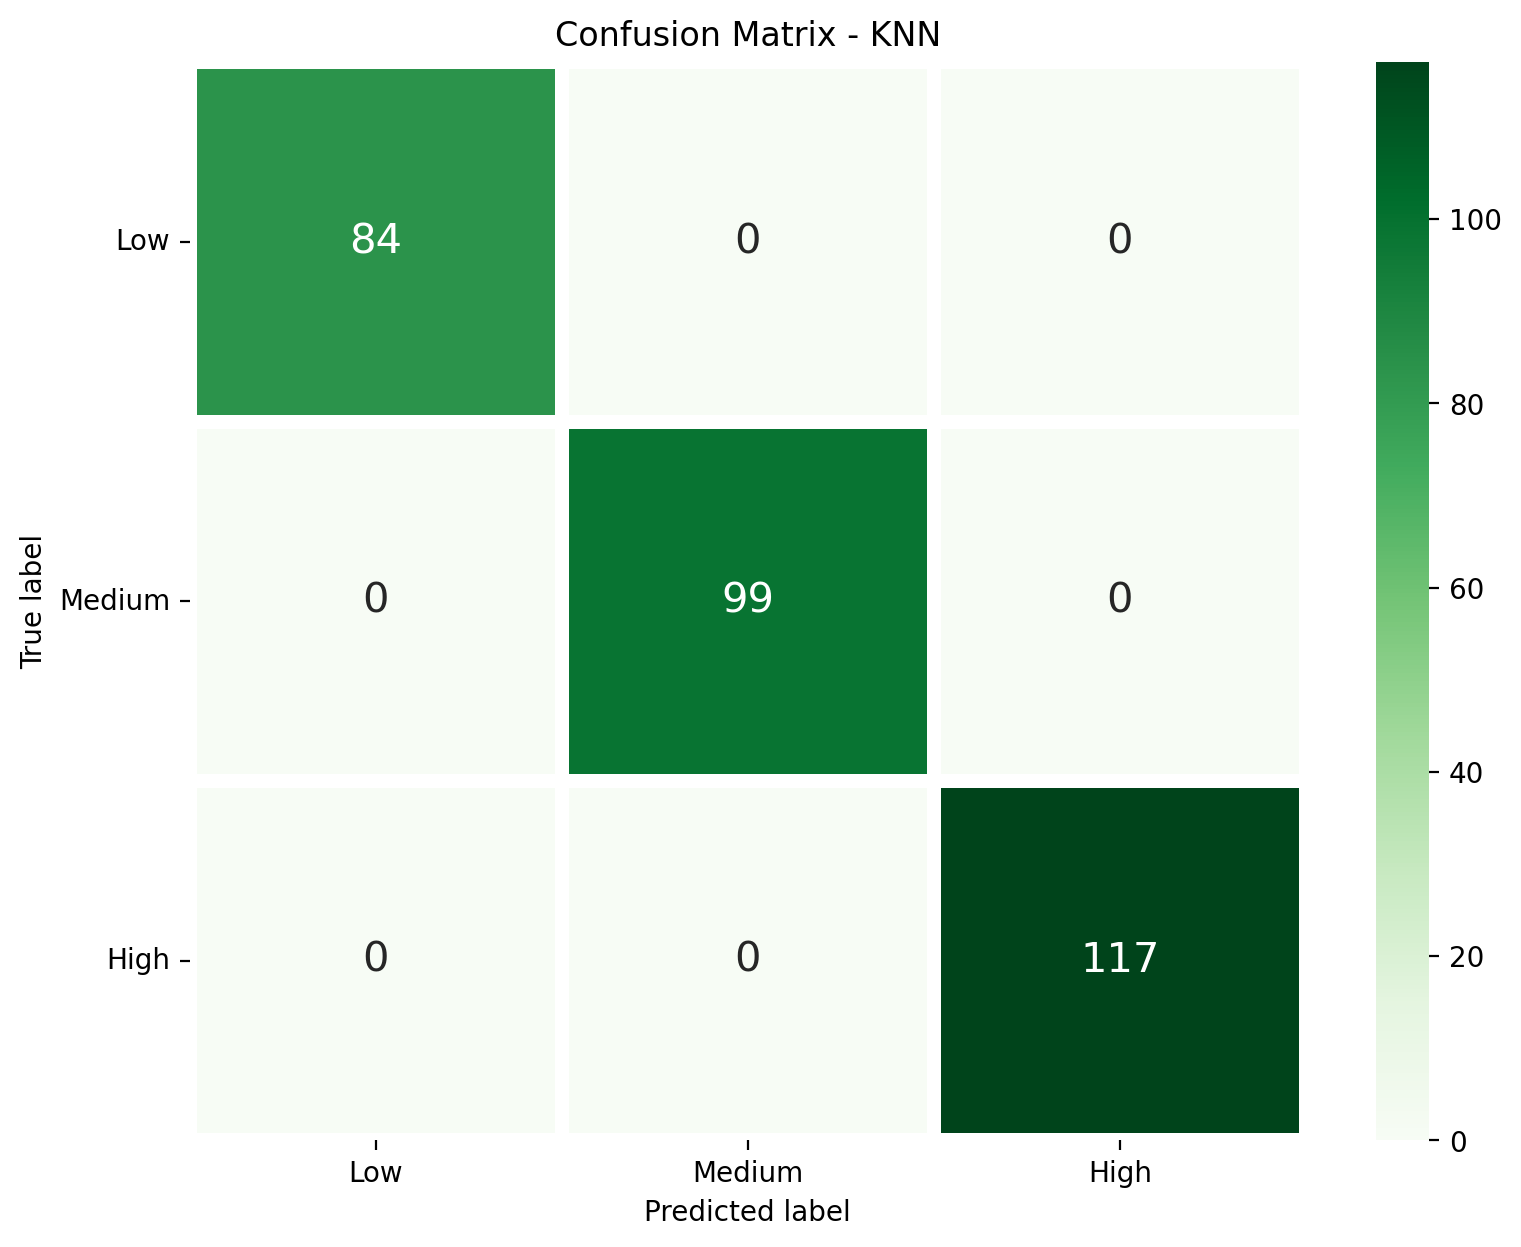

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [39]:
CM(y_test, knn_pred, col_names=['Low', 'Medium', 'High'], title='- KNN', cmap='Greens')

# View the classification report for test data and predictions
ml_accuracies['KNN'] = accuracy_score(y_test, knn_pred)
print(classification_report(y_test, knn_pred))

# 4.6 | Support Vector Machines

In [40]:
# Train Support Vector Machines
svm_model = SVC(C=0.5, kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions using Support Vector Machines
svm_pred = svm_model.predict(X_test)

4.5.2 | Confusion Matrix of Support Vector Machines

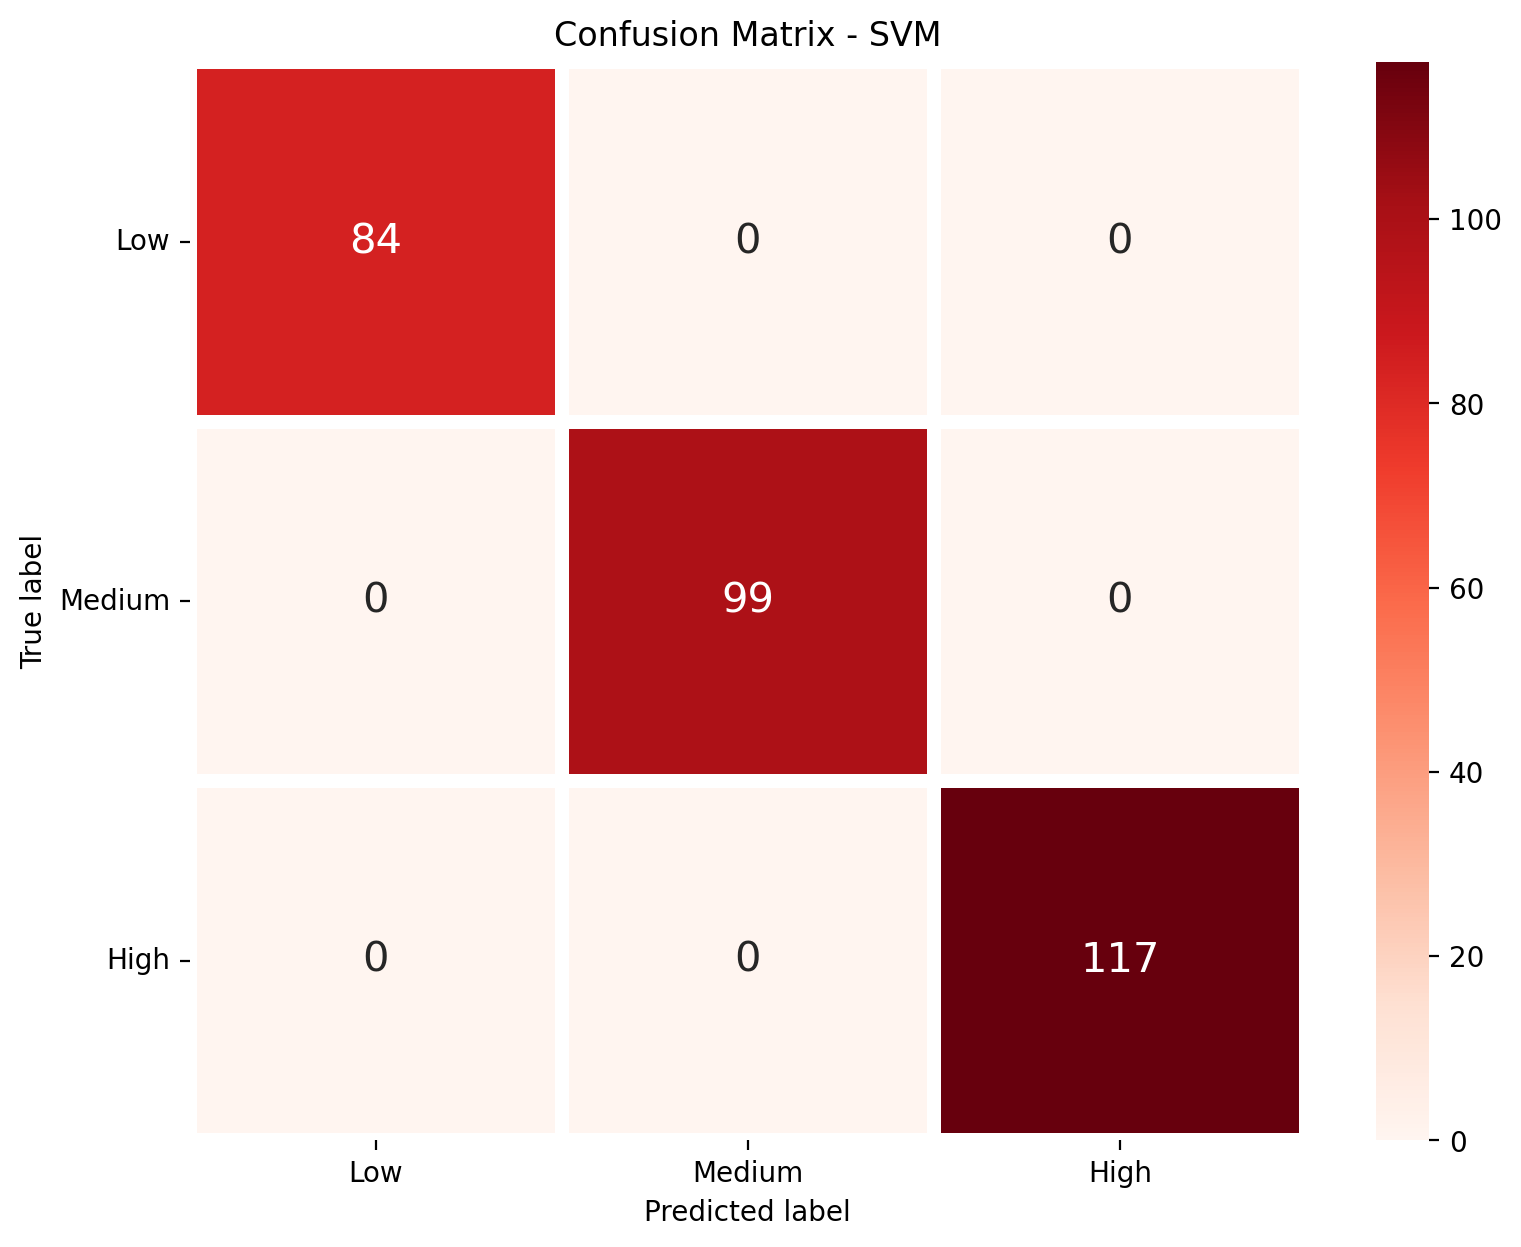

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [41]:
CM(y_test, svm_pred, col_names=['Low', 'Medium', 'High'], title='- SVM', cmap='Reds')

# View the classification report for test data and predictions
ml_accuracies['SVM'] = accuracy_score(y_test, svm_pred)
print(classification_report(y_test, svm_pred))

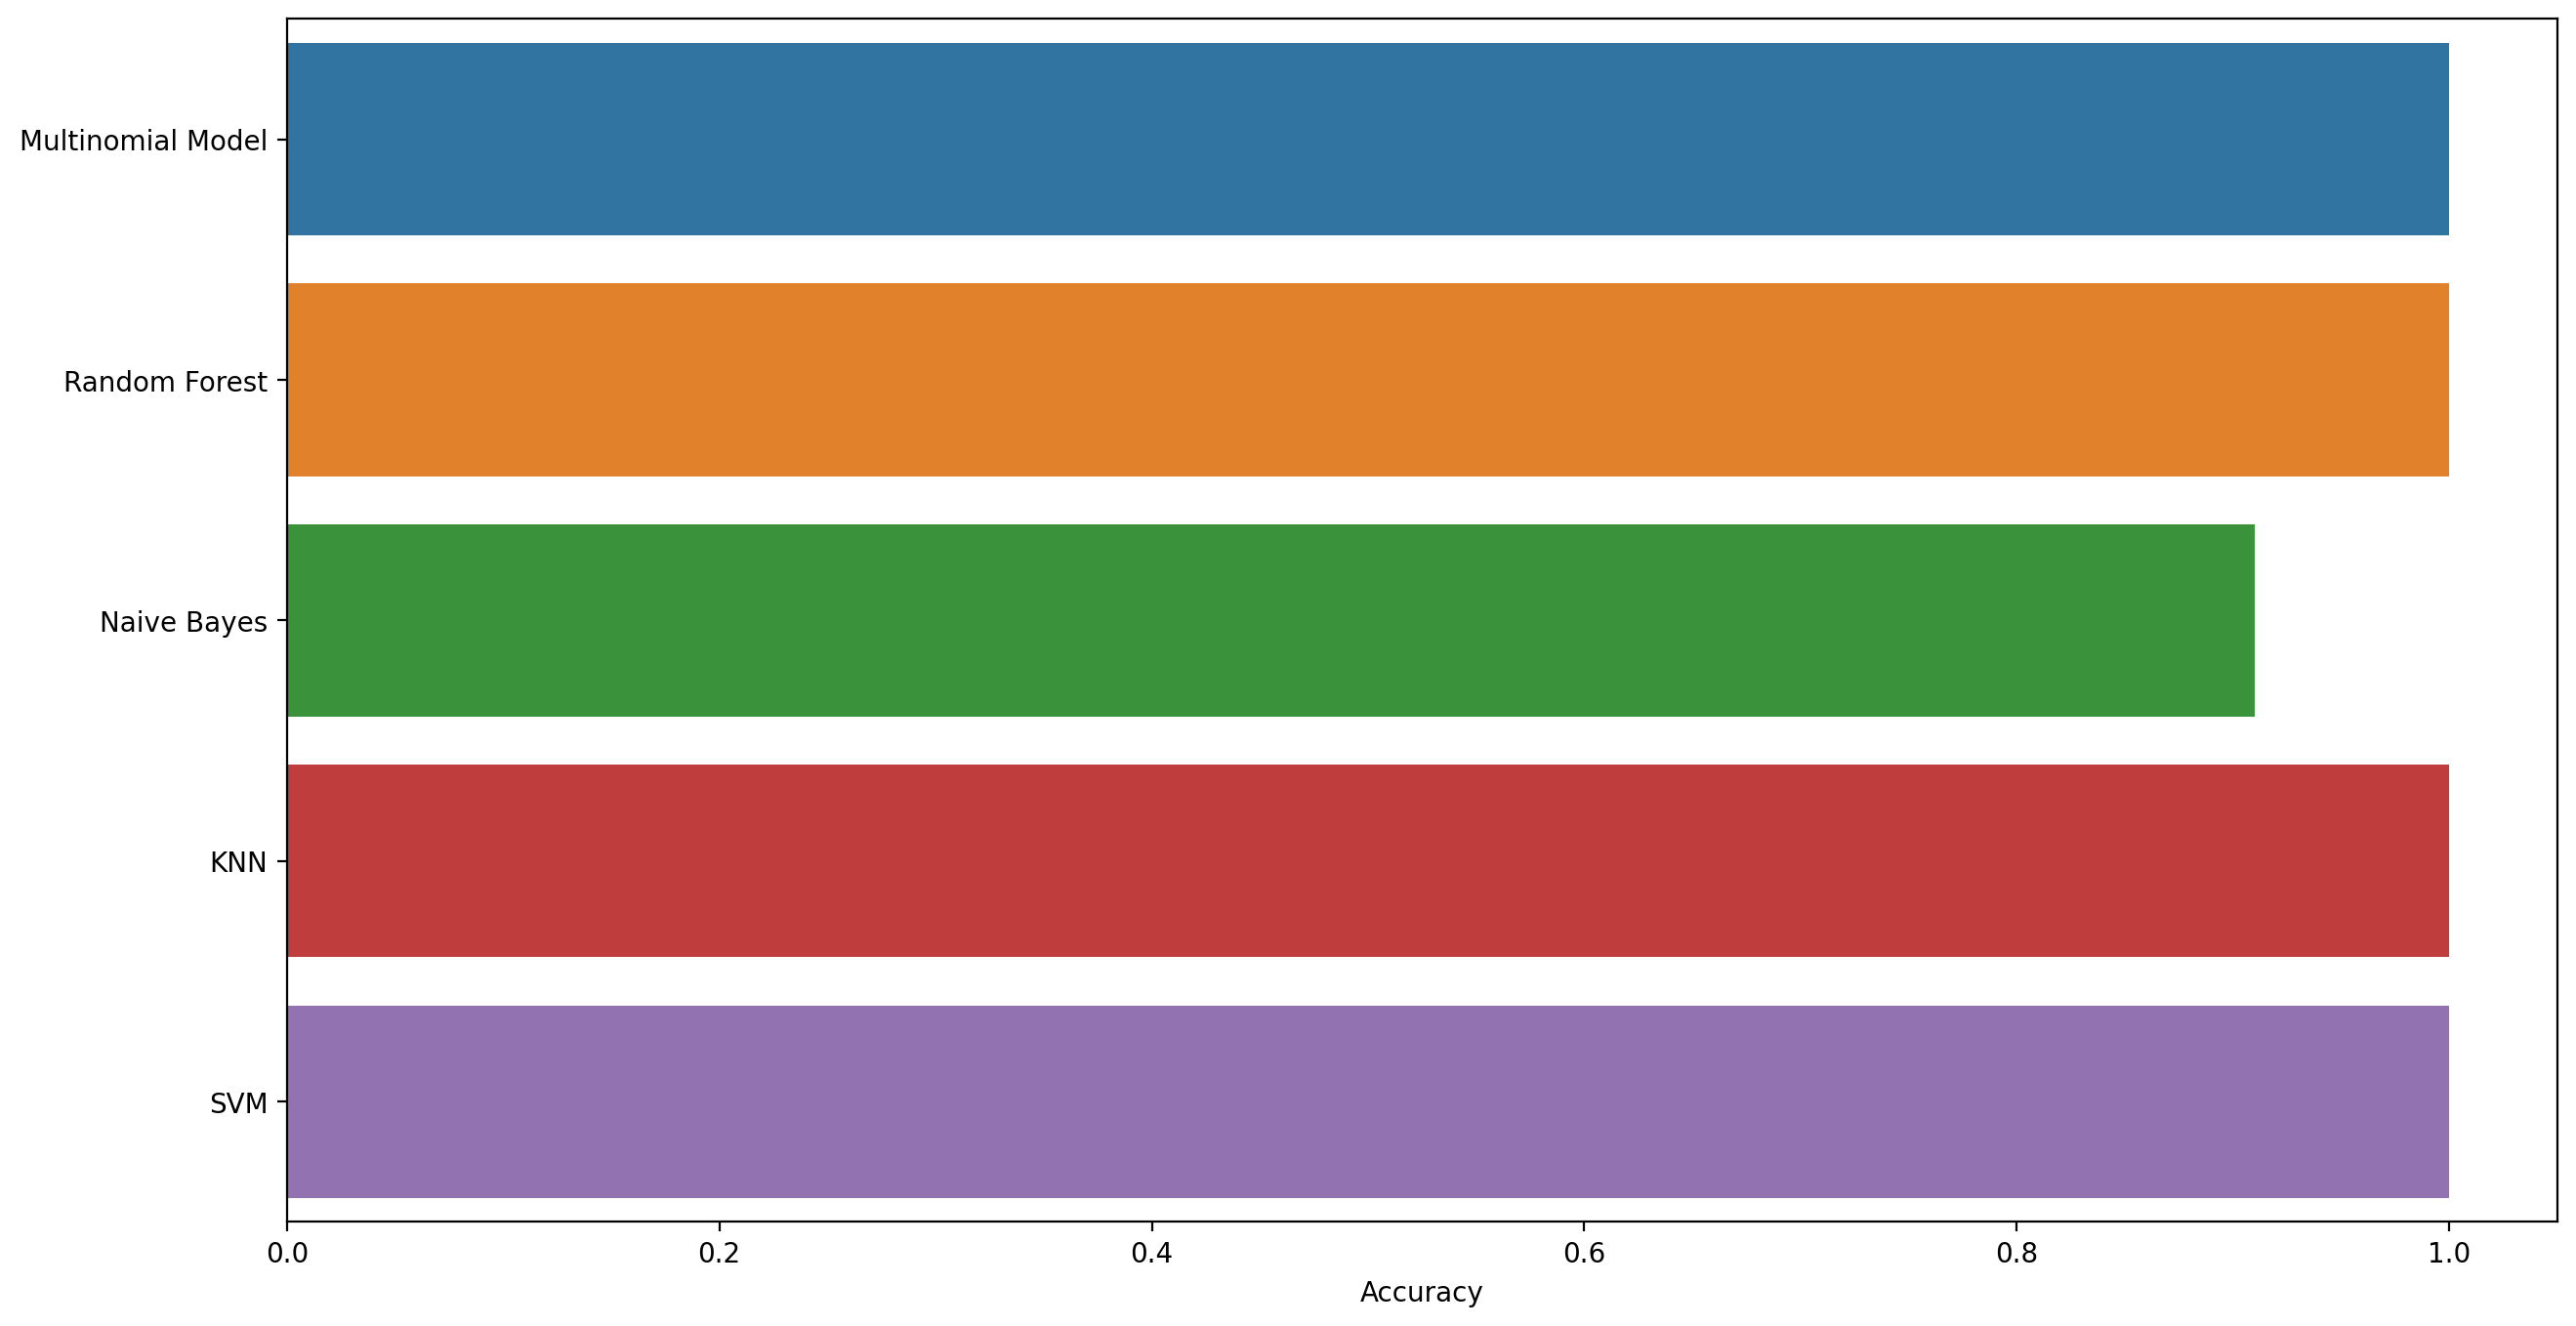

In [43]:
# More coming soon!
plt.figure(figsize=(15, 8))
sns.barplot(
    x=list(ml_accuracies.values()),
    y=list(ml_accuracies.keys()),
)
plt.xlabel('Accuracy')
plt.show()